##**0. Requerimientos**

Montar google drive

In [1]:
from IPython import display
! pip install -U accelerate
! pip install -U transformers
! pip install datasets
display.clear_output()

In [2]:
from IPython import display
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1. Carga de datos**

In [ ]:
from IPython import display
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/images_fakenews.zip" -d "/content/images"

In [ ]:
import zipfile
from tqdm.notebook import tqdm
import os

zip_path = '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/images_fakenews.zip'
extract_path = '/content/images'  # Modifica según la ruta donde quieras extraer los archivos

# Crear el directorio de destino si no existe
os.makedirs(extract_path, exist_ok=True)

# Descomprimir con barra de progreso
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Obtener la lista de archivos
    files = zip_ref.namelist()
    # Crear una barra de progreso
    with tqdm(total=len(files), desc="Extrayendo") as pbar:
        for file in files:
            zip_ref.extract(member=file, path=extract_path)
            pbar.update(1)  # Actualizar la barra de progreso por cada archivo extraído


Extrayendo:   0%|          | 0/54240 [00:00<?, ?it/s]

In [1]:
import pandas as pd
#Cargar dataset
file = '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/dataset_curso.csv'
df = pd.read_csv(file)

##**2. Analisis exploratorio de datos**

### **2.0 Importar librerias**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer

###**2.1. Analisis descriptivo básico**

**Descripción del dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56400 entries, 0 to 56399
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clean_title           56400 non-null  object 
 1   created_utc           56400 non-null  float64
 2   id                    56400 non-null  object 
 3   image_url             56265 non-null  object 
 4   linked_submission_id  16779 non-null  object 
 5   num_comments          39621 non-null  float64
 6   score                 56400 non-null  int64  
 7   upvote_ratio          39621 non-null  float64
 8   2_way_label           56400 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.9+ MB


In [ ]:
df.head(10)

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label
0,portland water supply to be flushed after teen...,1.397748e+09,239vnh,https://external-preview.redd.it/h_E8kwTPvvR6L...,NaN,6.0,5,0.78,1
1,when all the pundits said clinton would win th...,1.528325e+09,8p52o3,https://preview.redd.it/egrrssrbkg211.jpg?widt...,NaN,1.0,4,0.84,0
2,king femme dirty kitty this is my first time i...,1.563147e+09,cd9y6e,https://preview.redd.it/f5wxn4b5uca31.jpg?widt...,NaN,2.0,33,1.00,0
3,angry human yelling at peaceful human,1.439152e+09,3gduaq,https://external-preview.redd.it/8OkDeADBmg78e...,NaN,10.0,23,0.73,1
4,oh i get it now haha,1.428162e+09,cq10fmf,http://i.imgur.com/fpuSTrf.jpg,31c39q,NaN,1,NaN,0
5,gpa still got the game,1.436217e+09,csu8ljf,http://imgur.com/TkwQCza.jpg,3cb1be,NaN,14,NaN,0
6,the orange light and the rain on my windshield...,1.559869e+09,bxohq2,https://external-preview.redd.it/L5mNCLsSlLZ3n...,NaN,2.0,11,0.82,1
7,dad regrets not buying an ice cream for his da...,1.405011e+09,citmsnq,http://i.imgur.com/Y6LdLYu.jpg,2abzuh,NaN,413,NaN,0
8,doggy time,1.450611e+09,cy5em5o,http://i.imgur.com/3HKK1NW.jpg,3xipxw,NaN,2,NaN,0
9,the way that the new leaf is forming on my plant,1.565621e+09,cpdc8o,https://preview.redd.it/f7xuq6j661g31.jpg?widt...,NaN,1.0,10,0.86,1


Al visualizar la tablas anteriores,  podemos ver que cada columna representa lo siguiente:

- **clean_title**: El título de la publicación o artículo, que ha sido posiblemente preprocesado para fines de análisis (por ejemplo, eliminando caracteres especiales, normalizando espacios, etc.).
- **created_utc**: La marca de tiempo Unix cuando la publicación fue creada. La marca de tiempo Unix representa el número de segundos transcurridos desde la medianoche UTC del 1 de enero de 1970. Por ejemplo, 1.397748e+09 representa una fecha y hora específica en ese formato.
- **id**: Un identificador único para cada publicación, este id indica el nombre de la imagen que se obtiene desde image_url.
- **image_url**: La URL de la imagen asociada con la publicación.
- **linked_submission_id**: Parece ser el identificador de una publicación relacionada o una publicación a la que esta entrada está vinculada.
- **num_comments**: El número de comentarios que ha recibido la publicación. Esto puede ser un indicador de qué tan interactivo o popular es el contenido.
- **score**: La puntuación de la publicación, que es típicamente el número de votos positivos menos el número de votos negativos que ha recibido la publicación en plataformas como Reddit.
- **upvote_ratio**: La proporción de votos positivos sobre el total de votos. Un upvote_ratio de 1.00 significa que todos los votos fueron positivos, y un valor más bajo indica una proporción más alta de votos negativos.
- **2_way_label**: Una etiqueta binaria que clasifica las publicaciones como verdaderas (1) o falsas (0). En el contexto del conjunto indica que la publicación ha sido verificada y se considera veraz o una 'fábula'. Esta variable es la variable de interes para poder realizar nuestros modelos de predicción.

**Estádistica de variables númericas**

In [ ]:
df.describe()

,created_utc,num_comments,score,upvote_ratio,2_way_label
count,5.640000e+04,39621.000000,56400.000000,39621.000000,56400.000000
mean,1.478848e+09,20.306883,400.304291,0.856349,0.393759
std,6.956911e+07,139.407691,3055.095604,0.109896,0.488587
min,1.220076e+09,0.000000,-163.000000,0.510000,0.000000
25%,1.419071e+09,1.000000,5.000000,0.790000,0.000000
50%,1.489107e+09,2.000000,14.000000,0.880000,0.000000
75%,1.550362e+09,7.000000,46.000000,0.940000,1.000000
max,1.571802e+09,6912.000000,111320.000000,1.000000,1.000000


El dataset cuenta 56.400 filas. Al analizar la estadística basica podemos notar segun cada columna que:

- **created_utc**: Tiene una desviación estándar de aproximadamente 69.569.111 segundos (alrededor de 2,2 años) indica que las marcas de tiempo de creación de las publicaciones están dispersas en un rango de tiempo de aproximadamente 4,4 años (considerando dos desviaciones estándar a cada lado de la media). Esto muestra una variabilidad relativamente alta en la antigüedad de las publicaciones.
- **num_comments**: Con una desviación estándar de 139.4, significativamente mayor que la media de 20.3, esto indica que hay una amplia variación en el número de comentarios por publicación. Algunas publicaciones tienen muchísimos más comentarios que otras, lo que es típico de las plataformas de redes sociales, donde algunos temas o noticias se vuelven virales y reciben mucha atención, mientras que otros pasan desapercibidos. La publicación con más comentarios tiene 6.912.
- **score**: El promedio de puntuación es alrededor de 400, pero similar a los comentarios, hay una gran variabilidad, con publicaciones que van desde una puntuación negativa de -163 hasta una puntuación muy alta de 111,320. La desviación estándar aquí es extremadamente alta (3,055.1) en comparación con la media. Esto sugiere que, aunque la mayoría de las publicaciones tienen puntuaciones relativamente bajas, hay algunas publicaciones que son extremadamente populares y han recibido una gran cantidad de votos positivos, lo que aumenta la desviación estándar.
- **upvote_ratio**: La desviación estándar de 0.1099 es pequeña en comparación con la media de 0.8563, lo que indica que la mayoría de las publicaciones tienen una proporción de votos positivos relativamente alta y consistente, pero aún hay algunas variaciones, posiblemente debido a publicaciones controvertidas o divisivas que reciben más votos negativos.
- **2_way_label**: La desviación estándar es de 0.4886 con una media de 0.3938. Dado que es una variable binaria, la desviación estándar aquí es útil para entender cuán equilibradas están las clases. En este caso, hay más publicaciones etiquetadas como falsas (0) que verdaderas (1), y la desviación estándar cercana a 0.5 indica que la distribución de las etiquetas no es uniforme.

###**2.2. Manejo de datos**

**Análisis de unicidad, duplicidad y datos faltantes.**

In [ ]:
def describe_dataframe(df):
    # Crear un DataFrame para guardar las estadísticas
    stats = pd.DataFrame(index=df.columns,
                         columns=['data_type', 'total_values','unique_values', 'duplicated_values', 'missing_values'])

    # Rellenar el DataFrame con la información deseada
    for col in df.columns:
        stats.at[col, 'data_type'] = df[col].dtype
        stats.at[col, 'total_values'] = df[col].count()
        stats.at[col, 'unique_values'] = df[col].nunique()
        stats.at[col, 'duplicated_values'] = df[col].duplicated().sum()
        stats.at[col, 'missing_values'] = df[col].isna().sum()
    return stats

# Usar la función para describir el DataFrame
describe_dataframe(df)

,data_type,total_values,unique_values,duplicated_values,missing_values
clean_title,object,56400,53004,3396,0
created_utc,float64,56400,56391,9,0
id,object,56400,56400,0,0
image_url,object,56265,55498,901,135
linked_submission_id,object,16779,12319,44080,39621
num_comments,float64,39621,695,55704,16779
score,int64,56400,2904,53496,0
upvote_ratio,float64,39621,50,56349,16779
2_way_label,int64,56400,2,56398,0


Datos Faltantes:

- **image_url**: Hay 135 valores faltantes, lo que significa que no todas las publicaciones tienen una URL de imagen asociada. Para nuestro modelo se eliminarán los 135 datos faltantes en imágenes.
- **linked_submission_id**: Hay 39.621 valores faltantes, lo que indica que no todas las publicaciones están vinculadas a otra publicación o que la información de vinculación no está disponible.
- **num_comments y upvote_ratio**: Ambas columnas tienen 16,779 valores faltantes, lo que podría sugerir que un subconjunto de las publicaciones no ha recibido interacciones en la forma de comentarios o votos, o que estos datos no fueron registrados o están inaccesibles.

Unicidad y Duplicidad:
- **id**: No hay duplicados en el identificador de la publicación, lo que confirma que cada entrada en el conjunto de datos es única.
- **clean_title**: Con 53.004 títulos únicos de 56.400 entradas totales, hay 3.396 títulos duplicados. Esto podría ser un indicador de publicaciones reiteradas o de diferentes publicaciones que comparten títulos similares
- **created_utc**: Casi todos los valores de tiempo son únicos, con solo 9 duplicados, lo que sugiere que las publicaciones se crearon en momentos casi únicos.
- **image_url**: Hay 901 URLs de imágenes duplicadas, lo que podría indicar que algunas imágenes se reutilizan en múltiples publicaciones o que hay entradas repetidas que no han sido identificadas por su id.
- **linked_submission_id**: Hay un alto número de valores duplicados (44,080), lo que sugiere que muchas publicaciones pueden estar vinculadas a un conjunto

**Eliminamos dato faltantes**

In [ ]:
#df = df.dropna(subset=['image_url'])

**Duplicidad de imágenes y títulos**

In [ ]:
# Filtrar las filas donde tanto 'url_image' como 'clean_title' son duplicados
duplicated_rows = df[df.duplicated(subset=['image_url', 'clean_title'], keep=False)]

# Mostrar las filas duplicadas
print("N° de datos duplicados de imagenes y titulos:",len(duplicated_rows))

N° de datos duplicados de imagenes y titulos: 44


In [ ]:
# Ordenar las filas duplicadas por 'clean_title'
sorted_duplicated_rows = duplicated_rows.sort_values(by='clean_title')
sorted_duplicated_rows.head(6)

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label
50169,ant ritual,1.392652e+09,cfhibne,http://i.imgur.com/DEjOKdb.jpg,1y5gac,NaN,1,NaN,0
20357,ant ritual,1.389079e+09,cejezsy,http://i.imgur.com/DEjOKdb.jpg,1u80kz,NaN,11,NaN,0
26672,available here,1.567084e+09,eyh9dt2,https://i.redd.it/d3v88nxctcj31.jpg,cx0n4c,NaN,1,NaN,0
39541,available here,1.566335e+09,existaq,https://i.redd.it/e37drdjoanh31.jpg,ct647i,NaN,1,NaN,0
23557,available here,1.566354e+09,exjlm7z,https://i.redd.it/e37drdjoanh31.jpg,cta9pq,NaN,1,NaN,0
31506,available here,1.567100e+09,eyibsl2,https://i.redd.it/d3v88nxctcj31.jpg,cx44wf,NaN,1,NaN,0


También podemos ver que clean_title y image_url, tienen datos duplicados en conjunto, estos 44 datos y no aportan mucho a la creación de los modelos y serán eliminados.

In [ ]:
#df = df.drop_duplicates(subset=['image_url', 'clean_title'], keep='first')

**Boxplot para visualizar outliers**

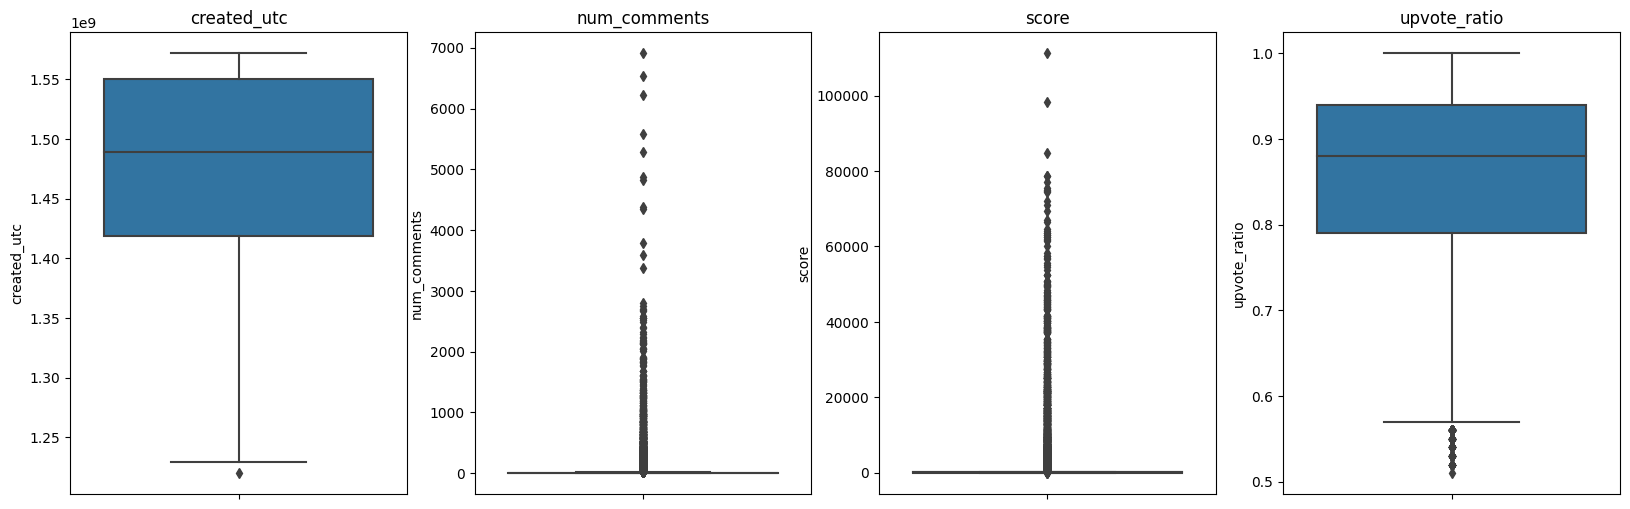

In [ ]:
# Asumiendo que 'df' es tu DataFrame y ya tiene las columnas necesarias.

# Lista de columnas numéricas para graficar
numerical_columns = ['created_utc', 'num_comments', 'score', 'upvote_ratio']
plt.figure(figsize=(20, 6))  # Ajuste las dimensiones para una mejor visualización vertical
# Crear un boxplot separado para cada variable numérica en orientación vertical
i=1
for col in numerical_columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=df[col])  # Usa 'y' en lugar de 'x' para una orientación vertical
    plt.title(f'{col}')
    i+=1

plt.show()


- **created_utc**: La distribución es bastante ajustada, lo que sugiere que los tiempos de creación de estos artículos están dentro de un marco de tiempo relativamente estrecho. Hay algunos valores atípicos que fueron creados mucho antes que el resto.
- **num_comments**: Hay un rango significativo en el número de comentarios, con una concentración de artículos que tienen pocos comentarios y algunos artículos con un número muy alto de comentarios, que son los valores atípicos.
- **score**: La distribución está muy sesgada, con la mayoría de los artículos teniendo un puntaje bajo y algunos artículos con puntajes excepcionalmente altos, indicados por los valores atípicos.
- **upvote_ratio**: El diagrama de caja es bastante estrecho, lo que indica que la mayoría de los artículos tienen una proporción de votos positivos entre aproximadamente 0.6 y 1.0. Hay un grupo de artículos con una proporción de votos positivos más baja, visto como valores atípicos debajo del cuadro principal.


###**2.3. Distribución de la variable objetivo ('2_way_label')**

Se examina cómo se distribuyen las clases verdaderas y falsas. Si existe un desequilibrio significativo, se pueden necesitar técnicas de balanceo de clases para el modelo predictivo.

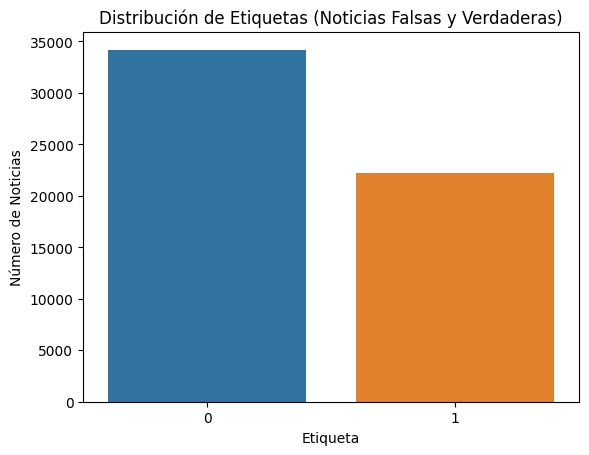

In [ ]:
# Contar el número de noticias falsas y verdaderas
count_labels = df['2_way_label'].value_counts()

# Crear un gráfico de barras
sns.barplot(x=count_labels.index, y=count_labels.values)

# Personalizar el gráfico
plt.xlabel('Etiqueta')
plt.ylabel('Número de Noticias')
plt.title('Distribución de Etiquetas (Noticias Falsas y Verdaderas)')

# Mostrar el gráfico
plt.show()

La barra azul (etiqueta 0) representa la cantidad de noticias que han sido identificadas como falsas. Por otro lado, la barra naranja (etiqueta 1) muestra la cantidad de noticias que han sido verificadas como verdaderas. Se observa claramente que el número de noticias falsas supera al de las verdaderas en este conjunto de datos, lo cual es indicativo de una mayor prevalencia de noticias falsas en el conjunto de datos analizado.

Este tipo de gráfico permite identificar rápidamente desequilibrios. En la lucha contra la desinformación, entender esta distribución es crucial, ya que un conjunto de datos con un número desproporcionado de noticias falsas podría sesgar los resultados de modelos predictivos de aprendizaje automático.


**Score vs 2_way_label**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


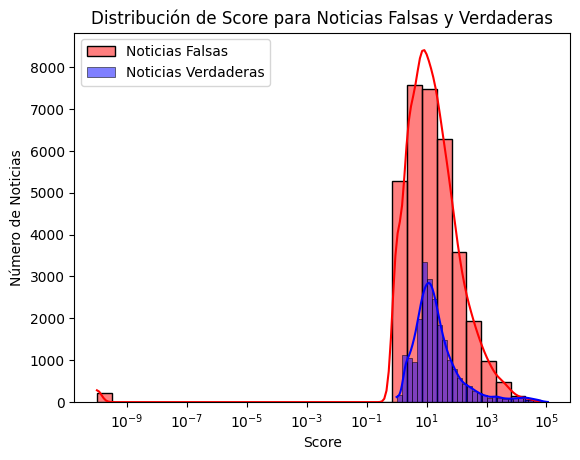

In [ ]:
df['score'] += 0.0000000001
noticias_falsas = df[df['2_way_label'] == 0]
noticias_verdaderas = df[df['2_way_label'] == 1]
bins=30

# Crear histograma usando seaborn
sns.histplot(noticias_falsas['score'], bins=bins, color='red', label='Noticias Falsas', kde=True, log_scale=True)
sns.histplot(noticias_verdaderas['score'], bins=bins, color='blue', label='Noticias Verdaderas', kde=True, log_scale=True)
# Personalizar el gráfico
plt.xlabel('Score')
plt.ylabel('Número de Noticias')
plt.title('Distribución de Score para Noticias Falsas y Verdaderas')
plt.legend()
plt.show()

Se observa que hay una diferencia significativa en la distribución de scores entre las noticias falsas y las verdaderas. Las noticias falsas (en rojo) muestran una concentración más alta de scores bajos, mientras que las noticias verdaderas (en azul) tienen una distribución que tiende hacia scores ligeramente más altos. Esto se evidencia por el pico más pronunciado y desplazado hacia la derecha en el histograma azul.

**num_comments vs 2_way_label**

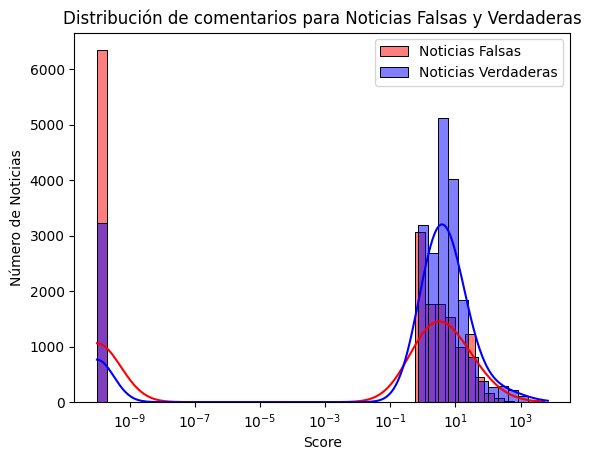

In [ ]:
df['num_comments'] += 0.0000000001

noticias_falsas = df[df['2_way_label'] == 0]
noticias_verdaderas = df[df['2_way_label'] == 1]
bins=45

# Crear histograma usando seaborn
sns.histplot(noticias_falsas['num_comments'], bins=bins, color='red', label='Noticias Falsas', kde=True, log_scale=True)
sns.histplot(noticias_verdaderas['num_comments'], bins=bins, color='blue', label='Noticias Verdaderas', kde=True, log_scale=True)
# Personalizar el gráfico
plt.xlabel('Score')
plt.ylabel('Número de Noticias')
plt.title('Distribución de comentarios para Noticias Falsas y Verdaderas')
plt.legend()
plt.show()

**created_utc vs 2_way_label**

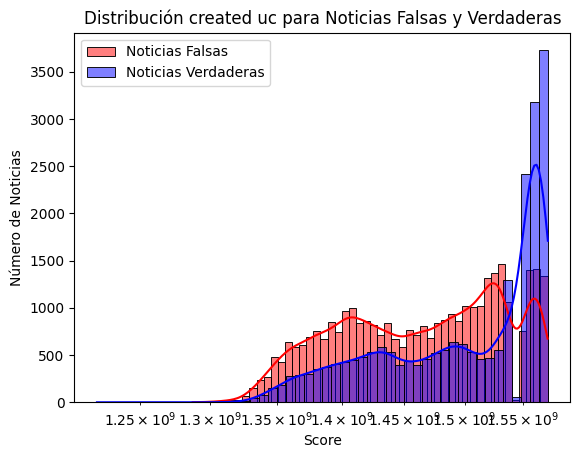

In [ ]:
noticias_falsas = df[df['2_way_label'] == 0]
noticias_verdaderas = df[df['2_way_label'] == 1]

def plot(bins=20):
    # Crear histograma usando seaborn
    sns.histplot(noticias_falsas['created_utc'], bins=bins, color='red', label='Noticias Falsas', kde=True, log_scale=True)
    sns.histplot(noticias_verdaderas['created_utc'], bins=bins, color='blue', label='Noticias Verdaderas', kde=True, log_scale=True)
    # Personalizar el gráfico
    plt.xlabel('Score')
    plt.ylabel('Número de Noticias')
    plt.title('Distribución created uc para Noticias Falsas y Verdaderas')
    # Mostrar la leyenda
    plt.legend()
    # Mostrar el histograma
    plt.show()

plot(50)

**upvote_ratio vs 2_way_label**

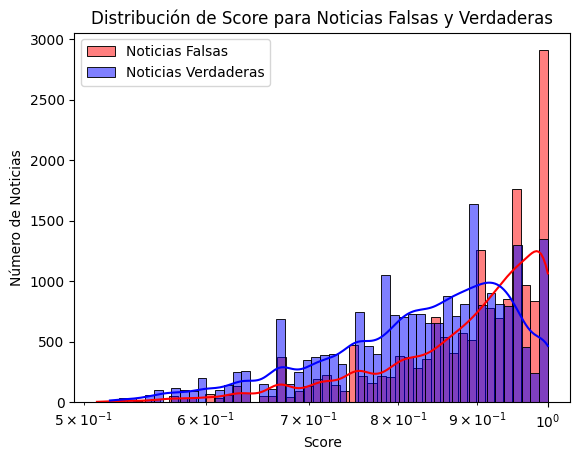

In [ ]:
noticias_falsas = df[df['2_way_label'] == 0]
noticias_verdaderas = df[df['2_way_label'] == 1]

def plot(bins=20):
    # Crear histograma usando seaborn
    sns.histplot(noticias_falsas['upvote_ratio'], bins=bins, color='red', label='Noticias Falsas', kde=True, log_scale=True)
    sns.histplot(noticias_verdaderas['upvote_ratio'], bins=bins, color='blue', label='Noticias Verdaderas', kde=True, log_scale=True)
    # Personalizar el gráfico
    plt.xlabel('Score')
    plt.ylabel('Número de Noticias')
    plt.title('Distribución de Score para Noticias Falsas y Verdaderas')
    # Mostrar la leyenda
    plt.legend()
    # Mostrar el histograma
    plt.show()

plot(50)

###**2.4. Análisis de texto**

**Palabras mas frecuentes, bigramas, trigramas y analisis de sentimientos.**

Se realiza una exploración de los títulos limpios para identificar palabras clave comunes, bigramas/trigramas frecuentes, y posiblemente se lleva a cabo un análisis de sentimientos. Esto puede revelar patrones lingüísticos asociados con noticias verdaderas o falsas.

In [ ]:
nltk.download('vader_lexicon')

# Extraer la columna de títulos limpios
clean_titles = df['clean_title']

# Analizar las palabras más comunes
word_freq = Counter(" ".join(clean_titles).split()).most_common(10)

# Analizar bigramas y trigramas más comunes
bigrams_freq = Counter(ngrams(" ".join(clean_titles).split(), 2)).most_common(10)
trigrams_freq = Counter(ngrams(" ".join(clean_titles).split(), 3)).most_common(10)

# Análisis de sentimientos
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(title) for title in clean_titles]

# Imprimir resultados
print(f"Palabras más comunes: {word_freq}")
print(f"Bigramas más comunes: {bigrams_freq}")
print(f"Trigramas más comunes: {trigrams_freq}")
print(f"Análisis de sentimientos (primeros 5 títulos): {sentiments[:5]}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Palabras más comunes: [('the', 16188), ('a', 12483), ('of', 8519), ('in', 7970), ('to', 7893), ('this', 7544), ('my', 4496), ('on', 4457), ('and', 3954), ('i', 3773)]
Bigramas más comunes: [(('in', 'the'), 1555), (('of', 'the'), 1457), (('on', 'the'), 969), (('looks', 'like'), 818), (('in', 'a'), 783), (('other', 'discussions'), 776), (('of', 'a'), 675), (('like', 'a'), 573), (('at', 'the'), 559), (('on', 'a'), 551)]
Trigramas más comunes: [(('looks', 'like', 'a'), 375), (('that', 'looks', 'like'), 127), (('the', 'way', 'this'), 101), (('in', 'front', 'of'), 92), (('one', 'of', 'the'), 82), (('out', 'of', 'the'), 78), (('the', 'first', 'time'), 72), (('for', 'the', 'first'), 71), (('the', 'way', 'the'), 70), (('i', 'found', 'a'), 70)]
Análisis de sentimientos (primeros 5 títulos): [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}, {'neg': 0.129, 'neu': 0.622, 'pos': 0.249, 'compound': 0.4019}, {'neg': 0.314, 'neu': 0.38

Para establecer un baseline en el análisis de texto, podemos comenzar con técnicas simples como conteo de frecuencia de palabras, bigramas y trigramas. Esto nos da una idea de los términos y frases más comunes, lo cual es un punto de partida para entender los datos.

- **Palabras más comunes**: Las palabras más comunes son principalmente artículos, preposiciones y pronombres ('the', 'a', 'of', 'in', 'to', 'this', 'my', 'on', 'and', 'i'). Estas palabras son muy comunes en el idioma inglés, pero no aportan mucho significado por sí solas (son conocidas como 'stop words').
- **Bigramas más comunes**: Los bigramas más comunes parecen seguir la misma tendencia que las palabras más comunes, incluyendo muchas 'stop words'. Sin embargo, hay combinaciones como ('looks', 'like') que podrían sugerir un patrón de lenguaje específico que merece más atención.
- **Trigramas más comunes**: Al igual que con los bigramas, los trigramas contienen muchas 'stop words'. Sin embargo, trigramas como ('looks', 'like', 'a') pueden ser parte de una frase que describe comparaciones o similitudes.
- **Análisis de sentimientos**: Se aplica el SentimentIntensityAnalyzer de NLTK para obtener una puntuación de sentimiento para los primeros cinco títulos muestra una mezcla de emociones. El primer título es neutro, el segundo y el quinto tienen una puntuación positiva, el tercero tiene una puntuación ligeramente positiva con una presencia notable de negatividad, y el cuarto es casi neutral con una leve inclinación negativa. Esto sugiere que los títulos varían en tono, lo que podría ser indicativo de diferentes tipos de noticias (por ejemplo, positivas, neutrales, negativas). El análisis de sentimientos puede ser útil para identificar la naturaleza emocional de los textos y, cuando se aplica a noticias, podría ayudar a detectar sesgos o tendencias en la forma en que se presentan las historias.

###**2.5. Tiempo de creación de los datos (`created_utc`)**

Se analiza si hay tendencias temporales en los datos, como eventos específicos que generaron picos de noticias falsas.

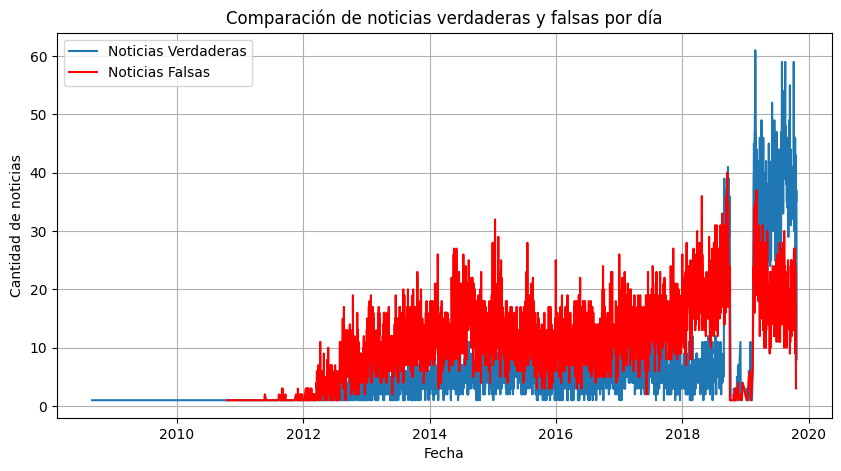

In [ ]:
# Convertir las marcas de tiempo Unix 'created_utc' a un formato de fecha legible
df['created_date'] = pd.to_datetime(df['created_utc'], unit='s')

# Agrupar por fecha y contar la cantidad de noticias por día
news_counts_by_date = df.groupby(df['created_date'].dt.date).size()

# Si la columna '2_way_label' contiene información sobre si la noticia es verdadera o falsa,
# podemos dividir el conjunto de datos en dos para comparar las tendencias
true_news = df[df['2_way_label'] == 1]
false_news = df[df['2_way_label'] == 0]

# Contar la cantidad de noticias verdaderas y falsas por día

true_counts_by_date = true_news.groupby(true_news['created_date'].dt.date).size()
false_counts_by_date = false_news.groupby(false_news['created_date'].dt.date).size()

plt.figure(figsize=(10, 5))
# Crear un gráfico de líneas para comparar las tendencias de noticias verdaderas y falsas
true_counts_by_date.plot(kind='line', label='Noticias Verdaderas')
false_counts_by_date.plot(kind='line', label='Noticias Falsas', color='red')

plt.title('Comparación de noticias verdaderas y falsas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de noticias')
plt.legend()
plt.grid(True)
plt.show()

Observamos que hay una cantidad fluctuante de noticias verdaderas y falsas a lo largo del tiempo. Sin embargo, hay un patrón notable en el que parece que la cantidad de noticias falsas (rojo) ha tenido un aumento significativo en ciertos períodos, especialmente antes del 2016 y posteriormente cerca del 2020. Esto podría coincidir con eventos globales importantes que podrían haber sido acompañados por un aumento en la difusión de noticias falsas.

Por otro lado, la cantidad de noticias verdaderas también muestra un aumento a través del tiempo, pero con un pico especialmente prominente cerca del año 2020. Esto podría deberse a un incremento en la cobertura de noticias durante eventos de gran interés público.

La superposición de las barras indica que en muchos días se reportaron tanto noticias verdaderas como falsas, lo que subraya la presencia constante de ambas en la circulación diaria de noticias.

Este tipo de visualización es útil para entender la dinámica temporal de la propagación de noticias y puede ser un punto de partida para investigaciones más detalladas sobre las causas de los picos en la difusión de noticias falsas y verdaderas.


###**2.6 Correlaciones**

<ipython-input-20-80f7c4d324b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


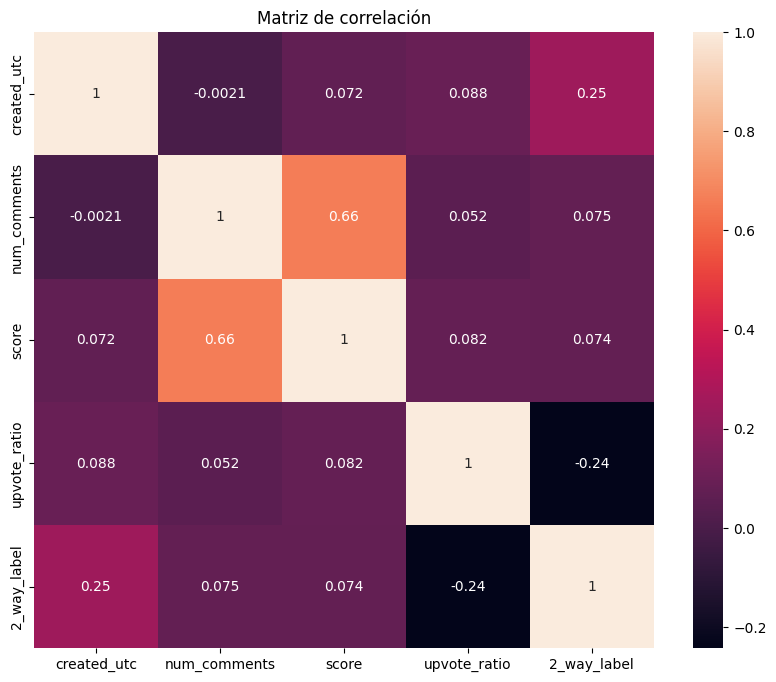

In [ ]:
# Matriz de correlación y mapa de calor
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()


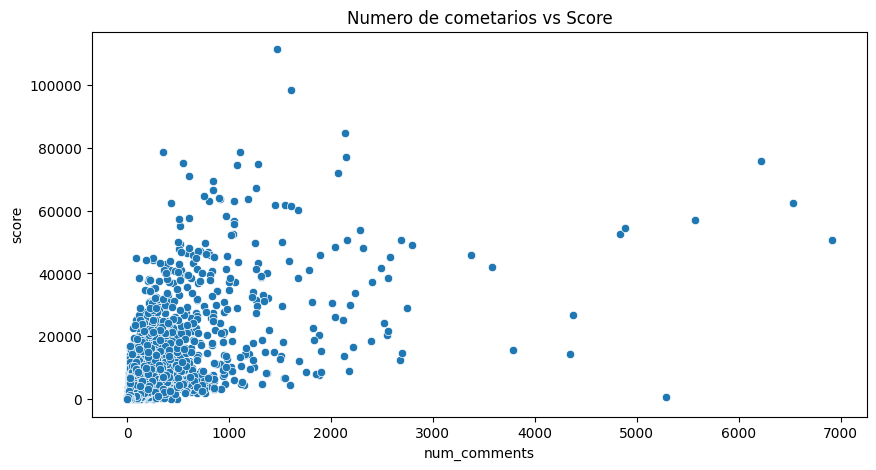

In [ ]:
# Gráfico de dispersión entre 'num_comments' y 'score'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='num_comments', y='score', data=df)
plt.title('Numero de cometarios vs Score')
plt.show()

Se observa una correlación positiva de 0.66 y la mayoría de los puntos están concentrados en la parte inferior izquierda del gráfico, lo que indica que la mayoría de las publicaciones tienen un número bajo de comentarios y un score bajo.

Importar librerias

In [ ]:
import os
import urllib.request
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

Rutina de descarga

In [ ]:
# Función para descargar una imagen
def download_image(row):
    if row["image_url"] != "" and row["image_url"] != "nan":
        image_url = row["image_url"]
        try:
            urllib.request.urlretrieve(image_url, "/content/images/" + str(row["id"]) + ".jpg")
        except:
            return row["id"]
    return None

# Crear la carpeta images en Google Drive si no existe
if not os.path.exists("/content/images"):
    os.makedirs("/content/images")

# Usar ThreadPoolExecutor para paralelizar la descarga
FAILED = []
with ThreadPoolExecutor(max_workers=20) as executor:
    for result in tqdm(executor.map(download_image, [row for _, row in df.iterrows()]), total=len(df)):
        if result:
            FAILED.append(result)

print("Done")
print(f"Failed to download {len(FAILED)} images.")

100%|██████████| 56400/56400 [14:18<00:00, 65.70it/s]

Done
Failed to download 2252 images.


In [ ]:
import shutil
# Mover la carpeta
shutil.move('/content/images' , '/content/drive/MyDrive/')

'/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/images'

## **4. Pipeline**

### **4.1. Preprocesar imagenes**

Importar librerias

In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image as ImagePIL
from tqdm import tqdm
import pandas as pd
import spacy
import ast
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA  # Puedes elegir PCA o t-SNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Funcion utilitaria para el dataset de imagenes

In [ ]:
# Clase CustomImageDataset hereda de Dataset para manejar un conjunto de datos de imágenes personalizado
class CustomImageDataset(Dataset):

    # El constructor de la clase toma la ruta del directorio raíz y un transformador opcional
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir        # Almacena la ruta del directorio raíz
        self.transform = transform      # Almacena el transformador de imagen (por ejemplo, para la normalización)
        self.image_paths = []           # Inicializa una lista para almacenar las rutas de las imágenes
        self.image_name = []            # Inicializa una lista para almacenar los nombres de las imágenes

        # Recorre todos los archivos en el directorio raíz
        for label in os.listdir(root_dir):
            # Construye la ruta completa de la imagen
            image_name = os.path.join(root_dir, label)
            try:
                # Intenta abrir la imagen y convertirla a formato RGB
                # Esto también sirve para verificar que el archivo sea una imagen válida
                _ = ImagePIL.open(image_name).convert("RGB")

                # Si se abre correctamente, agrega la ruta de la imagen a la lista de rutas
                self.image_paths.append(image_name)

                # Agrega el nombre de la imagen (sin la extensión .jpg) a la lista de nombres
                self.image_name.append(label.replace('.jpg', ''))
            except Exception:
                # Si ocurre un error al abrir la imagen, la ignora y continúa con la siguiente
                pass

    # Método especial para obtener la longitud del conjunto de datos
    # Retorna el número total de imágenes en el conjunto de datos
    def __len__(self):
        return len(self.image_paths)

    # Método especial para obtener un ítem del conjunto de datos por su índice
    # Carga y retorna la imagen y su nombre correspondiente al índice proporcionado
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]  # Obtiene la ruta de la imagen por su índice
        image_name = self.image_name[idx]   # Obtiene el nombre de la imagen por su índice

        image = Image.open(image_path).convert("RGB")  # Abre la imagen y la convierte a RGB
        if self.transform:
            image = self.transform(image)   # Si se proporcionó un transformador, lo aplica a la imagen

        return image, image_name  # Retorna la imagen y su nombre

Cargar y pasar a formato torch dataset de imagenes

In [ ]:
# Este fragmento de código está diseñado para preparar un conjunto de datos de imágenes para su procesamiento con PyTorch

# Establece la ruta a la carpeta que contiene las imágenes etiquetadas
# root_dir contiene la ruta del directorio donde se encuentran las imágenes que se usarán en el conjunto de datos
root_dir = '/content/images'

# Define las transformaciones que se aplicarán a las imágenes durante la carga del conjunto de datos
# Estas transformaciones son una secuencia (Compose) de diferentes transformaciones:
# - Resize: Cambia el tamaño de cada imagen a 256x256 píxeles
# - ToTensor: Convierte las imágenes en tensores de PyTorch, lo cual es necesario para el entrenamiento de modelos en PyTorch
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

# Crea una instancia de CustomImageDataset, que es una clase personalizada para manejar conjuntos de datos de imágenes
# Se le pasa la ruta del directorio de las imágenes y las transformaciones definidas anteriormente
# Este objeto 'custom_dataset' ahora representa el conjunto de datos que se utilizará para el entrenamiento o prueba
custom_dataset = CustomImageDataset(root_dir=root_dir, transform=transform)

# Crea un DataLoader de PyTorch para el conjunto de datos
# Un DataLoader facilita la carga de datos en lotes durante el entrenamiento o la evaluación de modelos, y ofrece opciones como el barajado (shuffle) de datos
# batch_size=10: Cada lote tendrá 10 imágenes
# shuffle=False: Los datos no se barajarán, lo que significa que se cargarán en el mismo orden en que se encuentran en el conjunto de datos
dloader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=False)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: ignored

Visualizar imagenes

In [ ]:
# Función para mostrar una imagen
def show_image(img, title):
    # Si la imagen es un tensor de PyTorch, la convierte a formato de imagen de PIL
    if isinstance(img, torch.Tensor):
        img = transforms.ToPILImage()(img)
    plt.imshow(img)
    plt.title(title)
    plt.show()

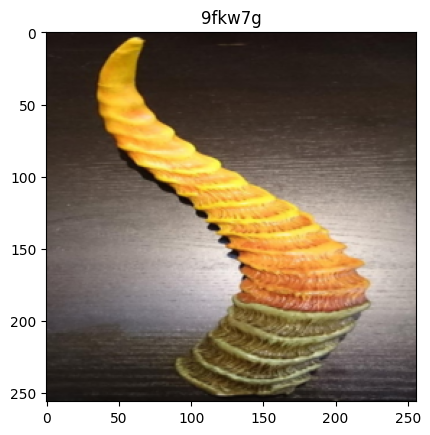

In [ ]:
# Obtiene el primer lote de imágenes del DataLoader 'dloader'
# next(iter(dloader)) retorna el primer elemento del iterador creado para 'dloader', que es el primer lote de imágenes y nombres
# 'images' contiene los tensores de imágenes, y 'names' contiene los nombres correspondientes a estas imágenes
images, names = next(iter(dloader))

# Mostrar la primera imagen del lote
show_image(images[1], names[1])

### **4.1 Res-net**

In [ ]:
# Importa un modelo pre-entrenado (ResNet18) desde PyTorch Hub.
# 'torch.hub.load' se utiliza para cargar modelos desde un repositorio centralizado como PyTorch Hub.
# 'pytorch/vision:v0.10.0' especifica la versión del repositorio de PyTorch Vision.
# 'resnet18' es el nombre del modelo específico que se está cargando.
# 'pretrained=True' indica que se desea cargar el modelo con pesos ya entrenados (pre-entrenados) en el dataset ImageNet
model_resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


In [ ]:
# Accediendo a la penúltima capa del modelo ResNet18.
# La penúltima capa es a menudo utilizada para extraer características (embeddings) de las imágenes,
# ya que representa una representación de alto nivel antes de la clasificación final.
layer = model_resnet._modules.get('avgpool')

# Definición de una función para copiar los embeddings de la penúltima capa.
# Esta función se utilizará como un "hook" para extraer los embeddings de la capa especificada.
def copy_embeddings(m, i, o):
    """
    Copia los embeddings de la penúltima capa.
    Args:
        m (torch.nn.Module): El módulo (capa) desde el cual se están copiando los embeddings.
        i (tuple): Una tupla que contiene los tensores de entrada al módulo.
        o (torch.Tensor): El tensor de salida del módulo.
    """
    # Procesa el tensor de salida para extraer los embeddings.
    # 'o[:, :, 0, 0]' reduce las dimensiones espaciales del tensor (si las hubiera).
    # 'detach' se utiliza para extraer los datos del tensor sin requerir gradiente.
    # 'numpy()' convierte el tensor a un array de NumPy.
    # 'tolist()' convierte el array de NumPy a una lista de Python.
    o = o[:, :, 0, 0].detach().numpy().tolist()

    # Añade los embeddings extraídos a la lista global 'outputs'.
    outputs.append(o)

# Inicializa una lista global 'outputs' para almacenar los embeddings copiados.
outputs = []

# Registra la función 'copy_embeddings' como un hook de la capa 'layer'.
# Un hook es una función que se llama automáticamente en ciertos puntos durante el forward pass.
# En este caso, 'copy_embeddings' se llamará cada vez que 'layer' (avgpool) complete un forward pass,
# permitiendo así extraer y almacenar los embeddings de las imágenes procesadas.
hook = layer.register_forward_hook(copy_embeddings)

In [ ]:
# Extracción de embeddings y etiquetas de imágenes utilizando el modelo ResNet y un DataLoader

# Inicializa una lista 'ids' para almacenar las etiquetas (nombres) de las imágenes
ids = []

# Itera sobre el DataLoader 'dloader'
# 'dloader' contiene pares de datos: imágenes ('X') y sus correspondientes etiquetas/nombres ('y')
# 'tqdm' se utiliza para envolver el iterador, proporcionando una barra de progreso para la iteración
for X, y in tqdm(dloader):
    # Agrega las etiquetas/nombres de las imágenes del lote actual a la lista 'ids'
    # Esto se hace para mantener un registro de a qué imagen corresponde cada embedding
    ids += y

    # Realiza un forward pass del modelo 'model_resnet' con el lote de imágenes 'X'
    # En este caso, no estamos interesados en la salida del modelo en sí ('_'),
    # sino en los efectos secundarios de este paso, que es la activación del hook
    # registrado anteriormente en la penúltima capa del modelo.
    # Este hook captura y almacena los embeddings de las imágenes en la lista 'outputs'
    # definida anteriormente en el hook 'copy_embeddings'.
    _ = model_resnet(X)


100%|██████████| 5413/5413 [27:56<00:00,  3.23it/s]


In [ ]:
# Creación de un DataFrame para almacenar los embeddings de las imágenes y sus identificadores

df_images = pd.DataFrame({

    # 'ids' contiene los nombres o etiquetas de las imágenes que fueron procesadas.
    'id': ids,

    # La columna 'embedding' se llena con los embeddings de las imágenes.
    # 'outputs' fue llenada previamente por el hook 'copy_embeddings' y contiene los embeddings
    # generados por el modelo ResNet para cada imagen.
    'embedding': [list(emb) for embs in outputs for emb in embs]
})

# Guarda el DataFrame 'df_images' en un archivo CSV llamado 'images_embeddings.csv'.
df_images.to_csv('images_embeddings.csv')


In [ ]:
df_images.head()

,id,embedding
0,b6z98f,"[0.578236997127533, 1.2001157999038696, 0.4811..."
1,9fkw7g,"[0.18444165587425232, 0.4117746651172638, 0.23..."
2,2y4vxw,"[0.6762349605560303, 0.2519152760505676, 0.450..."
3,cbqwa9v,"[0.7649177312850952, 2.6345410346984863, 1.233..."
4,cf9q1me,"[0.2830947935581207, 0.1307225078344345, 0.433..."


In [ ]:
len(df_images)

54122

### **4.2 Texts' Embeddings con Spycy Word2Vect**

In [ ]:
df_tab=df.copy()

In [ ]:
spacy.prefer_gpu()

# se genera una instancia del modelo de lenguaje naturaal a traves de metodo nlp, spacy requiere un modelo preentrenado
nlp = spacy.load("en_core_web_sm")

def get_emb(text):
    doc = nlp(text)
    return doc.vector

df_tab['text_emb'] = df_tab['clean_title'].apply(get_emb)

In [ ]:
df_tab.head()

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,text_emb
0,portland water supply to be flushed after teen...,1.397748e+09,239vnh,https://external-preview.redd.it/h_E8kwTPvvR6L...,NaN,6.0,5,0.78,1,"[-0.031187361, -0.44801548, 0.15922463, 0.1224..."
1,when all the pundits said clinton would win th...,1.528325e+09,8p52o3,https://preview.redd.it/egrrssrbkg211.jpg?widt...,NaN,1.0,4,0.84,0,"[0.16054955, -0.28997806, -0.11827656, 0.38963..."
2,king femme dirty kitty this is my first time i...,1.563147e+09,cd9y6e,https://preview.redd.it/f5wxn4b5uca31.jpg?widt...,NaN,2.0,33,1.00,0,"[-0.25856903, -0.59722465, 0.15544035, 0.18430..."
3,angry human yelling at peaceful human,1.439152e+09,3gduaq,https://external-preview.redd.it/8OkDeADBmg78e...,NaN,10.0,23,0.73,1,"[-0.0741545, -0.4442067, 0.20210105, -0.099609..."
4,oh i get it now haha,1.428162e+09,cq10fmf,http://i.imgur.com/fpuSTrf.jpg,31c39q,NaN,1,NaN,0,"[0.25628665, 0.061618794, 0.078922264, 0.47696..."


In [ ]:
len(df_tab)

56400

Uniendo dataset de datos tabulares con imagenes

In [ ]:
df_base = pd.merge(df_images, df_tab, how='outer', on='id')

def transform(x):
    if type(x) == float:
        return np.zeros(512)
    if type(x) == str:
        return np.array(ast.literal_eval(x))

    return x

df_base['img_embedding'] = df_base['embedding'].apply(transform)

In [ ]:
df_base.head()

,id,embedding,clean_title,created_utc,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,text_emb,img_embedding
0,b6z98f,"[0.578236997127533, 1.2001157999038696, 0.4811...",mango,1.553876e+09,https://preview.redd.it/31vew0b1jzo21.jpg?widt...,NaN,1.0,9,0.80,0,"[-1.1644554, -0.23776157, -0.5723567, 0.827459...","[0.578236997127533, 1.2001157999038696, 0.4811..."
1,9fkw7g,"[0.18444165587425232, 0.4117746651172638, 0.23...",this painted replica of an african gazelles ho...,1.536866e+09,https://preview.redd.it/v6s7dzjsz1m11.jpg?widt...,NaN,7.0,4,0.76,1,"[0.05873482, -0.027780026, -0.06299146, 0.2380...","[0.18444165587425232, 0.4117746651172638, 0.23..."
2,2y4vxw,"[0.6762349605560303, 0.2519152760505676, 0.450...",the life and times of an avalanche rescue dog ...,1.425651e+09,https://external-preview.redd.it/WAnVGFSDcn1B1...,NaN,0.0,6,1.00,1,"[0.62417245, -0.5512012, -0.044998884, -0.1697...","[0.6762349605560303, 0.2519152760505676, 0.450..."
3,cbqwa9v,"[0.7649177312850952, 2.6345410346984863, 1.233...",like a bull in a china shop,1.376926e+09,http://i.imgur.com/mkrs8DN.jpg,1kngeg,NaN,179,NaN,0,"[0.44048056, -0.43264502, 0.048038833, 0.05934...","[0.7649177312850952, 2.6345410346984863, 1.233..."
4,cf9q1me,"[0.2830947935581207, 0.1307225078344345, 0.433...",batters up,1.391810e+09,http://i.imgur.com/SKe4Qi5.jpg,1xahcd,NaN,19,NaN,0,"[0.29431504, 0.8328563, -0.6177403, 0.20718285...","[0.2830947935581207, 0.1307225078344345, 0.433..."


In [ ]:
len(df_base)

56400

### **4.3 Pipline**

In [ ]:
def transform(row):
    result = [x for x in row['text_emb']]
    return np.array(result + [x for x in row['img_embedding']])

df_base['total_emb'] = df_base.apply(transform, axis=1)

TypeError: ignored

In [ ]:
df_base.head()

In [ ]:
matriz_numpy = np.vstack(df_base['total_emb'].to_numpy())
matriz_numpy.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(matriz_numpy, df_base['2_way_label'], test_size=0.2, random_state=42)

Pipeline 1

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score

# Tu pipeline existente
pipeline1 = Pipeline([
    ('pca', PCA(n_components=50)),
    ('svm', SVC(kernel='linear', C=1.0))
])

pipeline1.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred1 = pipeline1.predict(X_test)

# Calculando las métricas y almacenándolas en un diccionario
metrics1 = {
    'Accuracy': pipeline1.score(X_test, y_test),
    'Recall': recall_score(y_test, y_pred1),
    'Precision': precision_score(y_test, y_pred1),
    'F1 Score': f1_score(y_test, y_pred1),
    'F-Beta Score': fbeta_score(y_test, y_pred1, beta=0.7)
}

# Imprimiendo el diccionario de métricas
print(metrics1)

Pipeline 2

In [ ]:
pipeline2 = Pipeline([
    ('pca', PCA(n_components= 455, svd_solver= 'arpack', random_state=42)),
    ('svm', SVC(kernel= 'poly', C= 1.1, random_state=42))
    ])

pipeline2.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred2 = pipeline2.predict(X_test)

# Calculando las métricas y almacenándolas en un diccionario
metrics2 = {
    'Accuracy': pipeline2.score(X_test, y_test),
    'Recall': recall_score(y_test, y_pred2),
    'Precision': precision_score(y_test, y_pred2),
    'F1 Score': f1_score(y_test, y_pred2),
    'F-Beta Score': fbeta_score(y_test, y_pred2, beta=0.7)
}

# Imprimiendo el diccionario de métricas
print(metrics2)

##**5.Modelos**

###**5.1. Modelos para datos tabulares**

Importar librerias

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

Obtener datos numericos de los datos tabulares

In [27]:
df_tab = df.copy()

#Dataset tabular con solo las variables numericas
df_tab = df_tab[['num_comments', 'score', 'upvote_ratio', '2_way_label']]
df_tab= df_tab[~df_tab['num_comments'].isna()]
X = df_tab[['num_comments', 'score', 'upvote_ratio']]
y = df_tab['2_way_label']

Datos faltantes

In [28]:
#Visualizar datos faltantes
X.isna().sum()

num_comments    0
score           0
upvote_ratio    0
dtype: int64

Division del dataset tabular en train y test

In [29]:
#Division del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Predicciones y metricas

In [30]:
#Función de métricas y matriz de confusión
def evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    df_metric = pd.DataFrame([{
    'Model name': model_name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'Fbeta Score': fbeta_score(y_test, y_pred, beta=0.7)
    }])

    print(f"métricas:\n{df_metric}\n")

    #matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=model.classes_
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')
    plt.title('Matriz de Confusión')
    plt.show()

    return y_pred, df_metric

**Regresión logistica**

métricas:
            Model name  Accuracy    Recall  Precision  F1 Score  Fbeta Score
0  Logistic Regression  0.651735  0.731042   0.680636  0.704939     0.696428



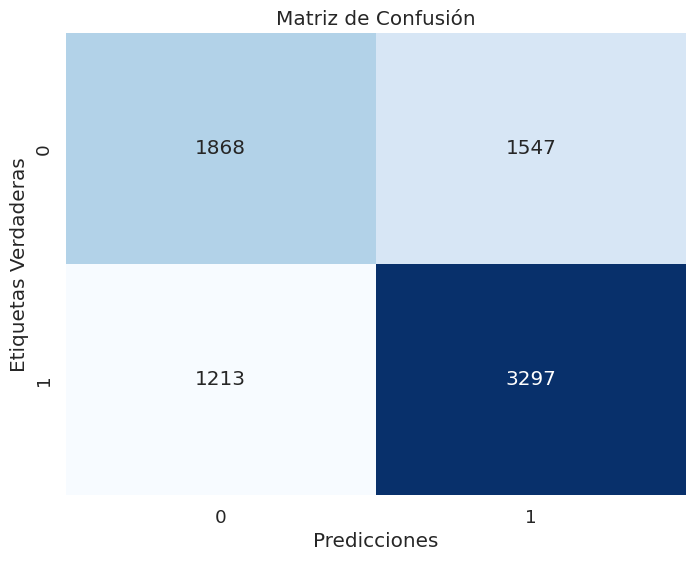

In [31]:
model1 = LogisticRegression(random_state=42)
predict1, metric1 = evaluate(model1,'Logistic Regression')

**Calsificador MLP**

métricas:
       Model name  Accuracy    Recall  Precision  F1 Score  Fbeta Score
0  MLP Classifier  0.701325  0.662084   0.779838  0.716153     0.736747



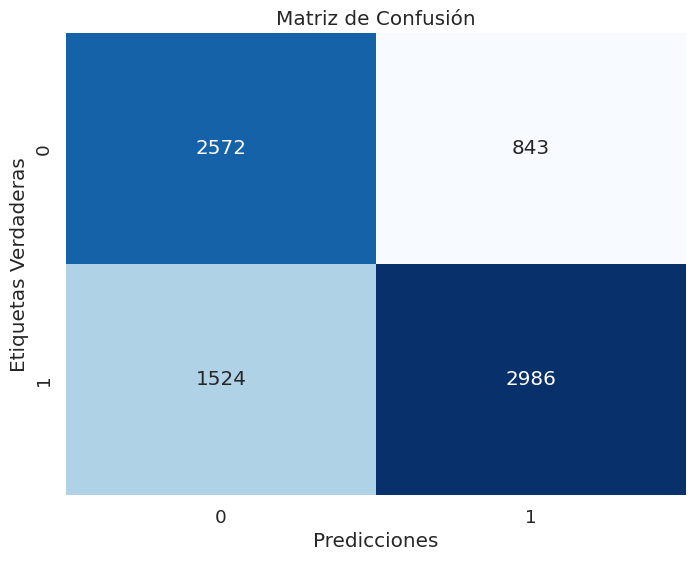

In [32]:
model2 = MLPClassifier(random_state=1, max_iter=300)
predict2, metric2 = evaluate(model2,'MLP Classifier')

**Random Forest**



métricas:
      Model name  Accuracy    Recall  Precision  F1 Score  Fbeta Score
0  Random Forest   0.69489  0.715078   0.740018  0.727334     0.731627



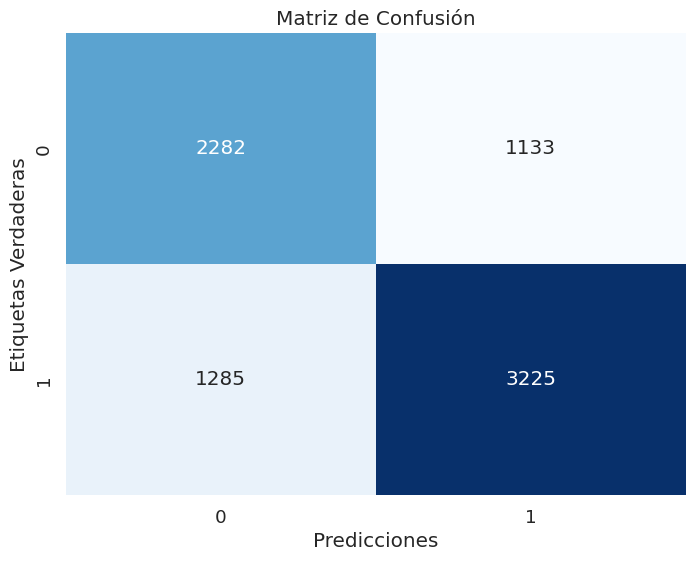

In [33]:
model3 = RandomForestClassifier(n_estimators=10)
predict3,metric3=evaluate(model3, 'Random Forest')

**Gradient Boosting Classifier**

métricas:
          Model name  Accuracy    Recall  Precision  F1 Score  Fbeta Score
0  Gradient Boosting  0.692871  0.731707   0.729443  0.730573     0.730186



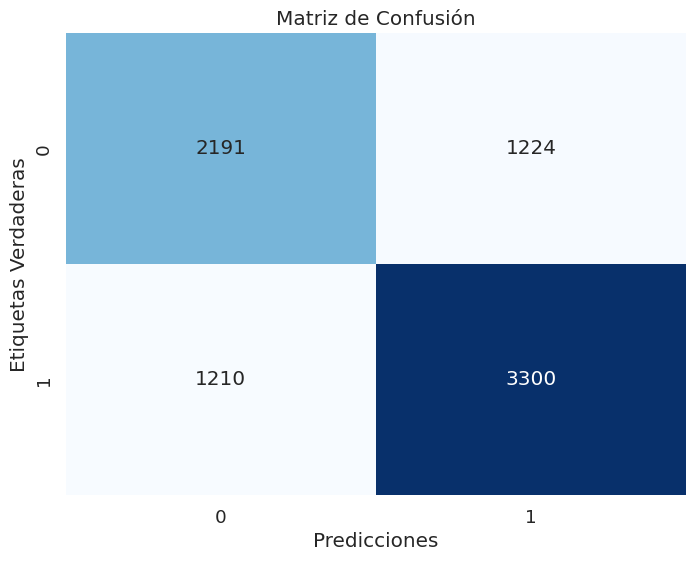

In [34]:
model4 = GradientBoostingClassifier(n_estimators=10)
predict4,metric4=evaluate(model4, 'Gradient Boosting')

In [35]:
df_resumen = pd.concat([metric1, metric2, metric3, metric4], ignore_index=True)
df_resumen

,Model name,Accuracy,Recall,Precision,F1 Score,Fbeta Score
0,Logistic Regression,0.651735,0.731042,0.680636,0.704939,0.696428
1,MLP Classifier,0.701325,0.662084,0.779838,0.716153,0.736747
2,Random Forest,0.694890,0.715078,0.740018,0.727334,0.731627
3,Gradient Boosting,0.692871,0.731707,0.729443,0.730573,0.730186


###**5.2. Modelos imagenes**

####**5.2.1. Carga de datos**

Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import torch
from PIL import Image as ImagePIL
from datasets import Dataset,Image,load_metric
from concurrent.futures import ThreadPoolExecutor
from transformers import TrainingArguments,Trainer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import cv2
from tqdm.auto import tqdm

Carga de imagenes

In [ ]:
#Cargar dataset
df_img = pd.read_csv('/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/dataset_curso.csv')
# Ponemos la ruta en una nueva columna del df para cada una de las imagenes
folder = '/content/images/'
df_img['image_path'] = df_img['id'].apply(lambda x: os.path.join(folder, f"{x}.jpg"))

In [ ]:
df_img.head()

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,image_path
0,portland water supply to be flushed after teen...,1.397748e+09,239vnh,https://external-preview.redd.it/h_E8kwTPvvR6L...,NaN,6.0,5,0.78,1,/content/images/239vnh.jpg
1,when all the pundits said clinton would win th...,1.528325e+09,8p52o3,https://preview.redd.it/egrrssrbkg211.jpg?widt...,NaN,1.0,4,0.84,0,/content/images/8p52o3.jpg
2,king femme dirty kitty this is my first time i...,1.563147e+09,cd9y6e,https://preview.redd.it/f5wxn4b5uca31.jpg?widt...,NaN,2.0,33,1.00,0,/content/images/cd9y6e.jpg
3,angry human yelling at peaceful human,1.439152e+09,3gduaq,https://external-preview.redd.it/8OkDeADBmg78e...,NaN,10.0,23,0.73,1,/content/images/3gduaq.jpg
4,oh i get it now haha,1.428162e+09,cq10fmf,http://i.imgur.com/fpuSTrf.jpg,31c39q,NaN,1,NaN,0,/content/images/cq10fmf.jpg


id: 37o254
modo: RGB
Tamaño:  (320, 320)


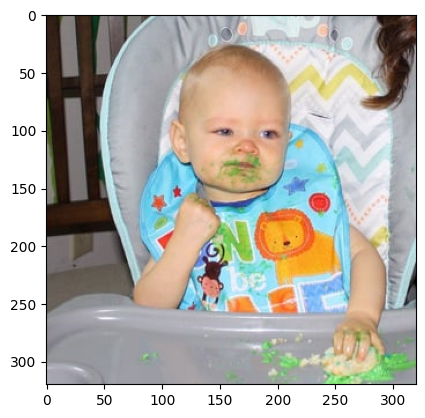

id: 2568mk
modo: RGB
Tamaño:  (320, 320)


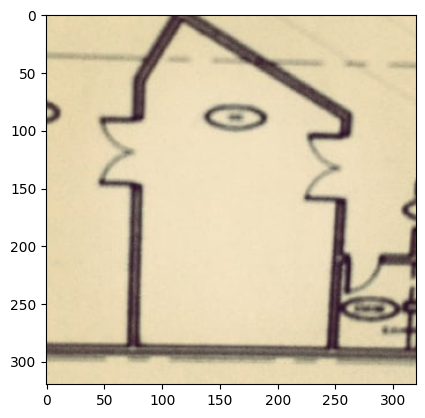

id: awlc8h
modo: RGB
Tamaño:  (320, 426)


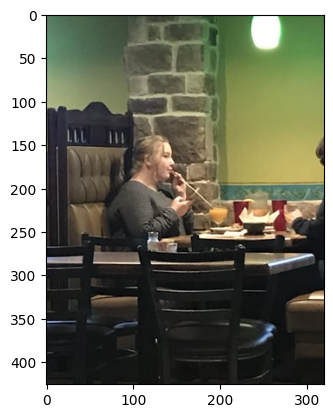

id: bbctte
modo: RGB
Tamaño:  (320, 240)


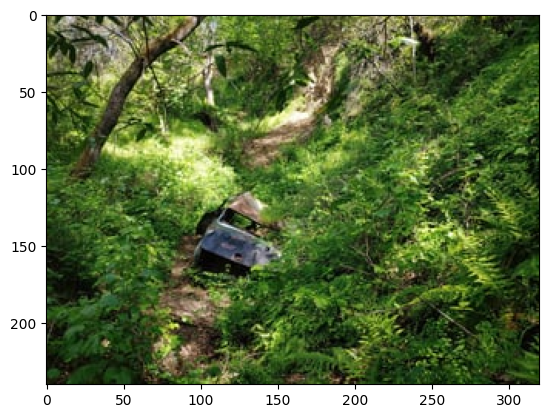

id: 2txnzj
modo: RGB
Tamaño:  (320, 320)


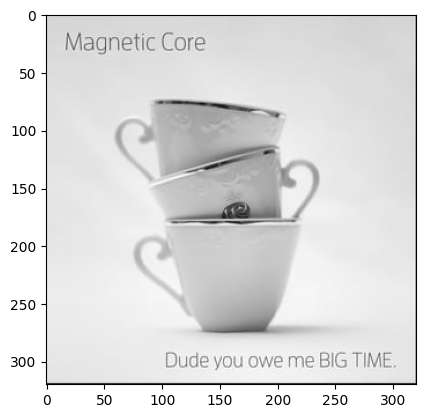

In [ ]:
import random
num_images = len(df_img)  # Obtener el número total de imágenes en el DataFrame
num_to_display = 5  # Número de imágenes a mostrar

for _ in range(num_to_display):
    random_index = random.randint(0, num_images - 1)  # Generar un índice aleatorio
    image_path = df_img.image_path[random_index]  # Obtener la ruta de la imagen aleatoria

    try:
        # Abrir la imagen con Pillow
        sample = ImagePIL.open(image_path)

        print("id:", df_img.id[random_index])
        print("modo:", sample.mode)
        print("Tamaño: ", sample.size)
        # Mostrar la imagen
        plt.imshow(sample)
        plt.show()
    except IOError:
        print("\nid:", df_img.id[random_index])
        print("No se pudo cargar la imagen\n")


In [ ]:
#funcion utilitaria para chequear imagenes que tengan el formato RGB devuelve el formato
def file_check_PIL(path):
    try:
        img = ImagePIL.open(path)
        return img.mode
    except:
        return False
df_img['has_image'] = df_img['image_path'].apply(file_check_PIL)

In [ ]:
df_img.head()

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,image_path,has_image
0,portland water supply to be flushed after teen...,1.397748e+09,239vnh,https://external-preview.redd.it/h_E8kwTPvvR6L...,NaN,6.0,5,0.78,1,/content/images/239vnh.jpg,RGB
1,when all the pundits said clinton would win th...,1.528325e+09,8p52o3,https://preview.redd.it/egrrssrbkg211.jpg?widt...,NaN,1.0,4,0.84,0,/content/images/8p52o3.jpg,False
2,king femme dirty kitty this is my first time i...,1.563147e+09,cd9y6e,https://preview.redd.it/f5wxn4b5uca31.jpg?widt...,NaN,2.0,33,1.00,0,/content/images/cd9y6e.jpg,RGB
3,angry human yelling at peaceful human,1.439152e+09,3gduaq,https://external-preview.redd.it/8OkDeADBmg78e...,NaN,10.0,23,0.73,1,/content/images/3gduaq.jpg,RGB
4,oh i get it now haha,1.428162e+09,cq10fmf,http://i.imgur.com/fpuSTrf.jpg,31c39q,NaN,1,NaN,0,/content/images/cq10fmf.jpg,RGB


In [ ]:
df_img.describe()

,created_utc,num_comments,score,upvote_ratio,2_way_label
count,5.640000e+04,39621.000000,56400.000000,39621.000000,56400.000000
mean,1.478848e+09,20.306883,400.304291,0.856349,0.393759
std,6.956911e+07,139.407691,3055.095604,0.109896,0.488587
min,1.220076e+09,0.000000,-163.000000,0.510000,0.000000
25%,1.419071e+09,1.000000,5.000000,0.790000,0.000000
50%,1.489107e+09,2.000000,14.000000,0.880000,0.000000
75%,1.550362e+09,7.000000,46.000000,0.940000,1.000000
max,1.571802e+09,6912.000000,111320.000000,1.000000,1.000000


In [ ]:
df_img.groupby('has_image').count()

,clean_title,created_utc,id,image_url,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,image_path
has_image,,,,,,,,,,
False,2187,2187,2187,2052,135,2052,2187,2052,2187,2187
CMYK,5,5,5,5,5,0,5,0,5,5
L,125,125,125,125,103,22,125,22,125,125
LA,1,1,1,1,1,0,1,0,1,1
P,3484,3484,3484,3484,881,2603,3484,2603,3484,3484
RGB,50551,50551,50551,50551,15607,34944,50551,34944,50551,50551
RGBA,47,47,47,47,47,0,47,0,47,47


In [ ]:
#crear dataset de imagenes
#filtrar solo las imagenes que tengas RGB
df_img= df_img[df_img['has_image'] == 'RGB']

#definir la ruta
df_img['image']=df_img['image_path']
df_img['labels']=df_img['2_way_label']

df_img= df_img[['image', 'labels']]
df_img.describe()

<ipython-input-13-bc99ed2da0fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img['image']=df_img['image_path']
<ipython-input-13-bc99ed2da0fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img['labels']=df_img['2_way_label']


,labels
count,50551.000000
mean,0.404700
std,0.490839
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_img['image'].describe()

count                          50551
unique                         50551
top       /content/images/239vnh.jpg
freq                               1
Name: image, dtype: object

Division del dataset tabular en train y test

In [ ]:
#Split inicial en train y validataion+test
train_val = Dataset.from_pandas(df_img) \
    .cast_column('image', Image()) \
    .train_test_split(test_size=0.3, shuffle=True, seed=42)

# Dividir el conjunto de entrenamiento en validacion y test
val_test= train_val['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)

# Obtener los conjuntos de datos resultantes
train_dataset = train_val['train']
val_dataset = val_test['train']
test_dataset = val_test['test']

# Obtener las longitudes de los conjuntos de datos
total_train = len(train_dataset)
total_val = len(val_dataset)
total_test = len(test_dataset)
total_data = total_train+total_val+total_test

# Calcular los porcentajes de asignación
percentage_train = (total_train / total_data) * 100
percentage_val = (total_val / total_data) * 100
percentage_test = (total_test / total_data) * 100

# Imprimir los resultados
print(f"Total de datos: {total_data}")
print(f"Train: {total_train} -->{percentage_train:.2f}%")
print(f"Validation:{total_val} -->{percentage_val:.2f}%")
print(f"Test:{total_test} --> {percentage_test:.2f}%")

Total de datos: 50551
Train: 35385 -->70.00%
Validation:7583 -->15.00%
Test:7583 --> 15.00%


####**5.2.2. Setting del entrenamiento**

Metricas

In [ ]:
from datasets import load_metric
# Carga de métricas
accuracy_metric = load_metric("accuracy")
recall_metric = load_metric("recall")
precision_metric = load_metric("precision")
f1_metric = load_metric("f1")

#Definir una funcion de metricas
def compute_metrics(prediction):
    logits, labels = prediction.predictions, prediction.label_ids
    predictions = np.argmax(logits, axis=1)

    # Calcula cada métrica
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    recall = recall_metric.compute(predictions=predictions, references=labels, average="macro")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="macro")
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="macro")

    # Calcula el Fβ score con beta=0.7
    beta = 0.7
    fbeta = (1 + beta**2) * (precision['precision'] * recall['recall']) / ((beta**2 * precision['precision']) + recall['recall'])

    # Retorna un diccionario con todas las métricas
    return {
        "accuracy": accuracy["accuracy"],
        "recall": recall["recall"],
        "precision": precision["precision"],
        "f1": f1["f1"],
        "fbeta": fbeta
    }

<ipython-input-16-680229a1111e>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")


Función para cargar los datos por batch

In [ ]:
# Función para cargar los datos por batch
def collate_fn(batch):
  return {
      "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
      "labels": torch.tensor([x["labels"] for x in batch])
  }

Funcion para entrenamiento

In [ ]:
#funcion para entrenamiento
def fit_transformer(model,train_prepared_ds,val_prepared_ds,compute_metrics,collate_fn,processor,output_dir="./model",batch_size=8,gradient_accumulation_steps=1,epoch=1,lr=5e-5):
  #Argumentos del entrenamiento
  training_args = TrainingArguments(
      output_dir=output_dir,
      evaluation_strategy="steps",
      num_train_epochs=epoch,
      learning_rate=lr, #por defecto es 5e-5
      load_best_model_at_end=True,
      remove_unused_columns=False,
      metric_for_best_model="f1",
      #weight_decay=0.01, #regularizacion
      save_steps=2000,
      #optim="adamw_hf",  # Uso de optimizador por defecto es adamw_torch
      #per_device_train_batch_size=batch_size,
      #per_device_eval_batch_size=batch_size
      #gradient_accumulation_steps=gradient_accumulation_steps,
  )

  #Constructor trainer
  trainer = Trainer(
      model=model,
      args=training_args,
      data_collator=collate_fn,
      compute_metrics=compute_metrics,
      train_dataset=train_prepared_ds,
      eval_dataset=val_prepared_ds,
      tokenizer=processor
  )

  return trainer

Funciones para visualizar perdidas

In [ ]:
# Funcion para graficar perdidas
def plot_loss(trainer):

  #Grafica de funciones de perdida
  train_loss = trainer.state.log_history

  # Filtrar las pérdidas de entrenamiento y validación
  train_losses = [x['loss'] for x in train_loss if 'loss' in x and 'runtime' not in x]
  eval_losses = [x['eval_loss'] for x in train_loss if 'eval_loss' in x]

  # Asegúrate de que las longitudes sean las mismas
  min_length = min(len(train_losses), len(eval_losses))
  train_losses = train_losses[:min_length]
  eval_losses = eval_losses[:min_length]
  epochs = range(1, min_length + 1)

  # Graficar
  plt.plot(epochs, train_losses, '-bo', label='Pérdida de entrenamiento')
  plt.plot(epochs, eval_losses, '-ro', label='Pérdida de validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Steps')
  plt.ylabel('Pérdida')
  plt.legend()

  plt.show()

Matriz de confusion

In [ ]:
def plot_confusion_matrix(trainer,test_prepared_ds):

  # Obtener predicciones en el conjunto de prueba
  predictions = trainer.predict(test_prepared_ds)

  # Obtener etiquetas reales y predichas
  y_true = predictions.label_ids
  y_pred = predictions.predictions.argmax(-1)

  # Obtener etiquetas de clase (esto puede variar según tu conjunto de datos)
  class_labels = ["Clase 0", "Clase 1"]

  # Calcular la matriz de confusión
  confusion = confusion_matrix(y_true, y_pred)

  # Crear un mapa de calor (heatmap) de la matriz de confusión en colores azules
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)
  sns.heatmap(confusion, annot=True, fmt='g', cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicción')
  plt.ylabel('Etiqueta Real')
  plt.title('Matriz de Confusión')
  plt.show()

####**5.2.3. Vision transformer (ViT)**

Cargar modelo, tokenizar y preparar el dataset para el entrenamiento

In [ ]:
from transformers import AutoImageProcessor,ViTForImageClassification

#Id del modelo ViT
model_id = "google/vit-base-patch16-224-in21k"
#Cargar modelo
model = ViTForImageClassification.from_pretrained(model_id,num_labels=2)
#Tokenizer
processor= AutoImageProcessor.from_pretrained(model_id)

# Preprocesar redimensiona y transformar un lote (batch) de ejemplos de datos antes de alimentarlos al modelo.
def transform(example_batch):
    inputs = processor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]
    return inputs

# Preparar los conjuntos de datos
train_prepared_ds = train_dataset.with_transform(transform)
val_prepared_ds = val_dataset.with_transform(transform)
test_prepared_ds = test_dataset.with_transform(transform)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Entrenamiento

In [ ]:
#Entrenamiento
trainer_vt = fit_transformer(model,
                          train_prepared_ds,
                          val_prepared_ds,
                          compute_metrics,
                          collate_fn,
                          processor,
                          output_dir="./image_model_ViT_2",
                          batch_size=8,
                          gradient_accumulation_steps=1,
                          epoch=1,
                          lr=5e-5)

train_results_vt = trainer_vt.train()

trainer_vt.save_model()
trainer_vt.log_metrics("train", train_results_vt.metrics)
trainer_vt.save_metrics("train", train_results_vt.metrics)

Step,Training Loss,Validation Loss


KeyboardInterrupt: ignored

Evaluacion

In [ ]:
#Evaluacion
metrics_vt = trainer_vt.evaluate(test_prepared_ds)
trainer_vt.log_metrics("eval", metrics_vt)
trainer_vt.save_metrics("eval", metrics_vt)

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.8147
  eval_f1                 =     0.8121
  eval_fbeta              =     0.8143
  eval_loss               =     0.3929
  eval_precision          =     0.8108
  eval_recall             =     0.8216
  eval_runtime            = 0:05:28.37
  eval_samples_per_second =     23.095
  eval_steps_per_second   =      2.887


Perdidas

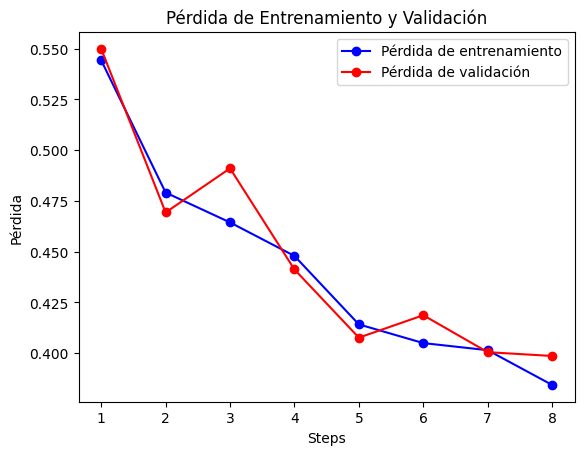

In [ ]:
plot_loss(trainer_vt)

Matriz de confusion

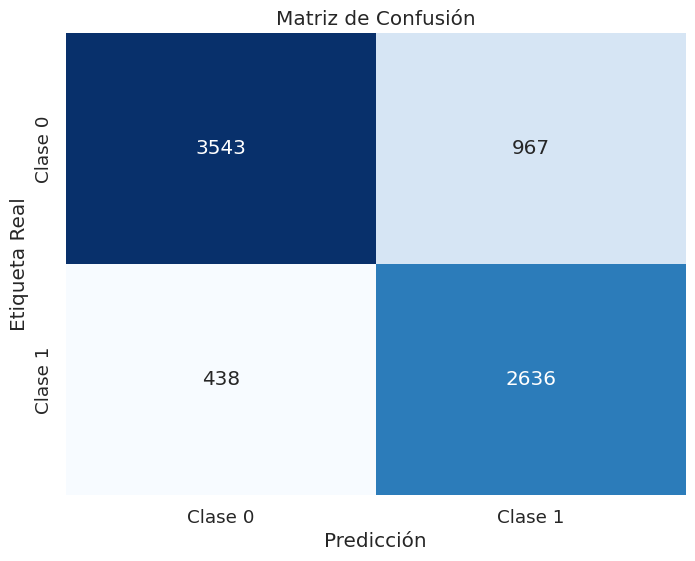

In [ ]:
plot_confusion_matrix(trainer_vt,test_prepared_ds)

#### **5.2.5. DinoV2**

Cargar modelo, tokenizar y preparar el dataset para el entrenamiento

In [ ]:
from transformers import AutoImageProcessor, Dinov2ForImageClassification

#Id del modelo renset
model_id =  "facebook/dinov2-small-imagenet1k-1-layer"
#Cargar modelo
model= Dinov2ForImageClassification.from_pretrained(model_id)
#Tokenizer
processor  = AutoImageProcessor.from_pretrained(model_id)

# Preprocesar y transformar un lote (batch) de ejemplos de datos antes de alimentarlos al modelo.
def transform(example_batch):
    inputs = processor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]
    return inputs

# Preparar los conjuntos de datos
train_prepared_ds = train_dataset.with_transform(transform)
val_prepared_ds = val_dataset.with_transform(transform)
test_prepared_ds = test_dataset.with_transform(transform)

config.json:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/91.3M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Entrenamiento

In [ ]:
#Entrenamiento
trainer_dinov2 = fit_transformer(model,
                          train_prepared_ds,
                          val_prepared_ds,
                          compute_metrics,
                          collate_fn,
                          processor,
                          output_dir="./image_model_DinoV2",
                          batch_size=8,
                          gradient_accumulation_steps=1,
                          epoch=3,
                          lr=1e-4)

train_results_dinov2 = trainer_dinov2.train()
trainer_dinov2.save_model()
trainer_dinov2.log_metrics("train", train_results_dinov2.metrics)
trainer_dinov2.save_metrics("train", train_results_dinov2.metrics)

Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1,Fbeta
500,0.852400,0.733337,0.443888,0.510410,0.521403,0.399111,0.517736
1000,0.705200,0.735417,0.411051,0.498797,0.482866,0.304250,0.487992
1500,0.694100,0.713975,0.421073,0.506136,0.545992,0.325923,0.532210
2000,0.686900,0.681290,0.590927,0.500000,0.295464,0.371436,0.341390
2500,0.680800,0.691926,0.590927,0.500000,0.295464,0.371436,0.341390
3000,0.678000,0.724285,0.590400,0.500000,0.500009,0.373916,0.500006
3500,0.671400,0.665789,0.591455,0.517510,0.551578,0.454745,0.539890
4000,0.668800,0.663699,0.596466,0.541542,0.565139,0.519373,0.557155


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***** train metrics *****
  epoch                    =         1.0
  total_flos               = 679432686GF
  train_loss               =      0.7011
  train_runtime            =  0:51:23.67
  train_samples_per_second =      11.476
  train_steps_per_second   =       1.435


Evaluacion

In [ ]:
#Evaluacion
metrics_dinov2 = trainer_dinov2.evaluate(test_prepared_ds)
trainer_dinov2.log_metrics("eval", metrics_dinov2)
trainer_dinov2.save_metrics("eval", metrics_dinov2)

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.5932
  eval_f1                 =     0.5094
  eval_fbeta              =     0.5482
  eval_loss               =      0.665
  eval_precision          =     0.5554
  eval_recall             =     0.5341
  eval_runtime            = 0:03:48.92
  eval_samples_per_second =     33.128
  eval_steps_per_second   =      4.141


Perdidas

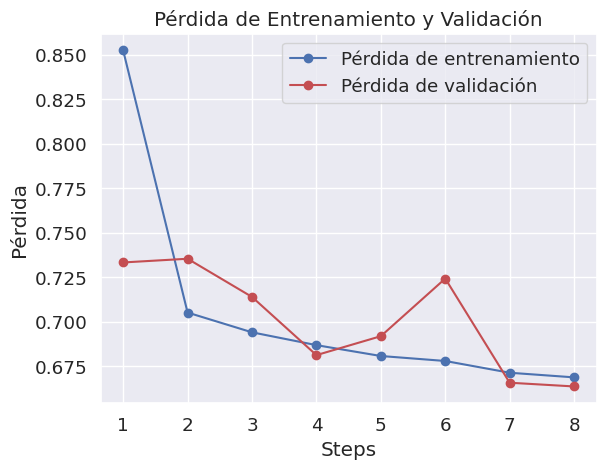

In [ ]:
plot_loss(trainer_dinov2)

Matriz de confusión

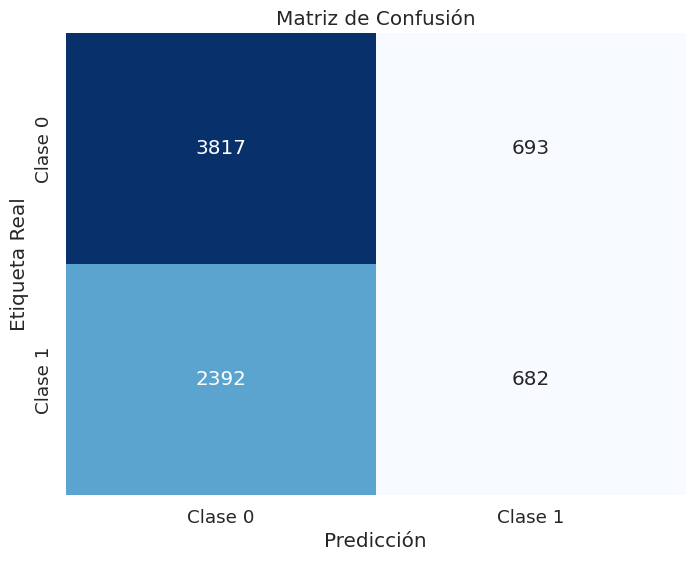

In [ ]:
plot_confusion_matrix(trainer_dinov2,test_prepared_ds)

#### **5.2.3. Resnet**

Cargar modelo, tokenizar y preparar el dataset para el entrenamiento

In [ ]:
from transformers import AutoImageProcessor, ResNetForImageClassification

#Id del modelo renset
model_id =  "microsoft/resnet-50"
#Cargar modelo
model = ResNetForImageClassification.from_pretrained(model_id)
#Tokenizer
processor  = AutoImageProcessor.from_pretrained(model_id)

# Preprocesar y transformar un lote (batch) de ejemplos de datos antes de alimentarlos al modelo.
def transform(example_batch):
    inputs = processor([x for x in example_batch["image"]], return_tensors="pt")
    inputs["labels"] = example_batch["labels"]
    return inputs

# Preparar los conjuntos de datos
train_prepared_ds = train_dataset.with_transform(transform)
val_prepared_ds = val_dataset.with_transform(transform)
test_prepared_ds = test_dataset.with_transform(transform)

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/103M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Entrenamiento

In [ ]:
#Entrenamiento
trainer_resnet= fit_transformer(model,
                          train_prepared_ds,
                          val_prepared_ds,
                          compute_metrics,
                          collate_fn,
                          processor,
                          output_dir="./image_model_Resnet",
                          batch_size=4,
                          gradient_accumulation_steps=1,
                          epoch=3,
                          lr=1e-4)

train_results_resnet = trainer_resnet.train()
trainer_resnet.save_model()
trainer_resnet.log_metrics("train", train_results_resnet.metrics)
trainer_resnet.save_metrics("train", train_results_resnet.metrics)

Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1,Fbeta
500,4.506200,2.871198,0.384017,0.000919,0.001525,0.001143,0.001253
1000,1.223100,1.247948,0.609785,0.003225,0.003549,0.003377,0.003435
1500,0.766300,0.822916,0.658315,0.005925,0.006173,0.006038,0.006089
2000,0.687300,0.781405,0.679151,0.008867,0.009079,0.008920,0.009008
2500,0.644900,0.731393,0.692734,0.009391,0.009612,0.009484,0.009538
3000,0.607000,0.709040,0.692602,0.009587,0.009842,0.009710,0.009756
3500,0.605300,0.797877,0.692866,0.011895,0.012173,0.012015,0.012080
4000,0.590600,0.693862,0.698272,0.011423,0.011598,0.011442,0.011540


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

***** train metrics *****
  epoch                    =         1.0
  total_flos               = 760737994GF
  train_loss               =       1.145
  train_runtime            =  0:43:30.27
  train_samples_per_second =      13.557
  train_steps_per_second   =       1.695


Evaluacion

In [ ]:
#Evaluacion
metrics_resnet = trainer_resnet.evaluate(test_prepared_ds)
trainer_resnet.log_metrics("eval", metrics_resnet)
trainer_resnet.save_metrics("eval", metrics_resnet)

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.6962
  eval_f1                 =     0.0111
  eval_fbeta              =     0.0112
  eval_loss               =     0.7737
  eval_precision          =     0.0113
  eval_recall             =      0.011
  eval_runtime            = 0:03:09.85
  eval_samples_per_second =     39.947
  eval_steps_per_second   =      4.993


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Perdidas

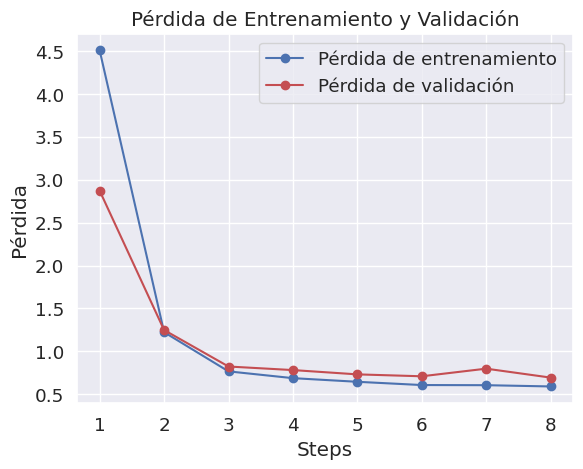

In [ ]:
plot_loss(trainer_resnet)

Matriz de confusion

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


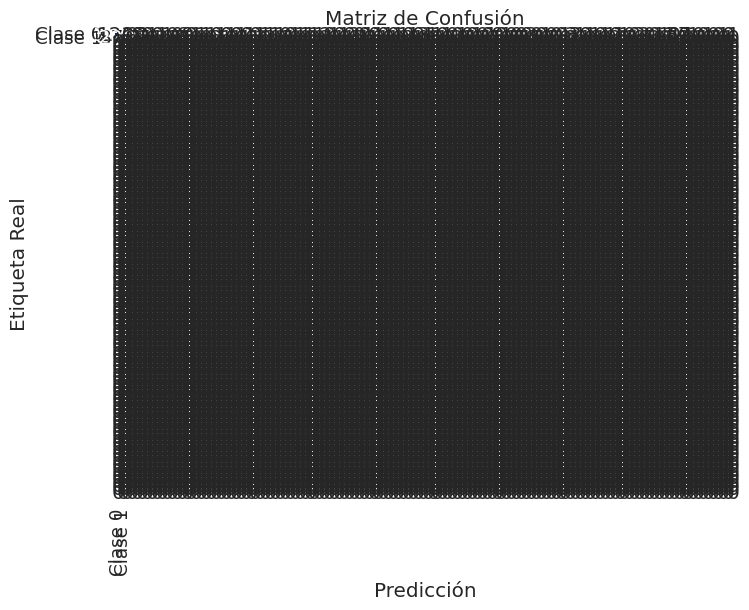

In [ ]:
plot_confusion_matrix(trainer_resnet,test_prepared_ds)

###**5.3. Modelo de texto**

####**5.2.1. Setting datos de Texto**

Importar librerias

In [2]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer,DataCollatorWithPadding,AutoModelForSequenceClassification,TrainingArguments,Trainer
from datasets import Dataset,load_metric

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Cargar data de texto

In [3]:
#definir dataframe de texto con variables de interes
#Cargar dataset
df_txt = pd.read_csv('/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/dataset_curso.csv')
df_txt['label'] = df_txt['2_way_label']
df_txt = df_txt[['clean_title', 'label']]

Metricas

In [4]:
# Carga de métricas
accuracy_metric = load_metric("accuracy")
recall_metric = load_metric("recall")
precision_metric = load_metric("precision")
f1_metric = load_metric("f1")

def compute_metrics(prediction):
    logits, labels = prediction.predictions, prediction.label_ids
    predictions = np.argmax(logits, axis=1)

    # Calcula cada métrica
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    recall = recall_metric.compute(predictions=predictions, references=labels, average="macro")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="macro")
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="macro")

    # Calcula el Fβ score con beta=0.7
    beta = 0.7
    fbeta = (1 + beta**2) * (precision['precision'] * recall['recall']) / ((beta**2 * precision['precision']) + recall['recall'])

    # Retorna un diccionario con todas las métricas
    return {
        "accuracy": accuracy["accuracy"],
        "recall": recall["recall"],
        "precision": precision["precision"],
        "f1": f1["f1"],
        "fbeta": fbeta
    }

<ipython-input-4-1495b64d8ff6>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")


Funcion para el entrenamiento

In [8]:
#funcion para entrenamiento
def fit_transformer(model,train_prepared_ds,val_prepared_ds,compute_metrics,collate_fn,processor,output_dir="./model",batch_size=8,gradient_accumulation_steps=1,epoch=1,lr=5e-5):

  #Parametros de entrenamiento
  training_args = TrainingArguments(
      output_dir = output_dir,
      evaluation_strategy="steps",
      #evaluation_strategy="epoch",
      num_train_epochs=epoch,
      learning_rate=lr,
      #optim="rmsprop",  # Por defecto adamw_torch
      load_best_model_at_end=True,
      remove_unused_columns=False,
      no_cuda=False,
      #save_strategy="epoch"
  )

  #Configurar el entrenamiento
  trainer = Trainer(
      model,
      training_args,
      train_dataset=train_prepared_ds,
      eval_dataset=val_prepared_ds,
      data_collator=data_collator,
      tokenizer=tokenizer,
      compute_metrics=compute_metrics,
      #optimizers=(optimizer, None)  # Pasar el optimizador personalizado
  )

  return trainer


Funcion para graficar perdidas

In [9]:
# Funcion para graficar perdidas
def plot_loss(trainer):

  #Grafica de funciones de perdida
  train_loss = trainer.state.log_history

  # Filtrar las pérdidas de entrenamiento y validación
  train_losses = [x['loss'] for x in train_loss if 'loss' in x and 'runtime' not in x]
  eval_losses = [x['eval_loss'] for x in train_loss if 'eval_loss' in x]

  # Asegúrate de que las longitudes sean las mismas
  min_length = min(len(train_losses), len(eval_losses))
  train_losses = train_losses[:min_length]
  eval_losses = eval_losses[:min_length]
  epochs = range(1, min_length + 1)

  # Graficar
  plt.plot(epochs, train_losses, '-bo', label='Pérdida de entrenamiento')
  plt.plot(epochs, eval_losses, '-ro', label='Pérdida de validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Steps')
  plt.ylabel('Pérdida')
  plt.legend()

  plt.show()

Matriz de confusión

In [10]:
def plot_confusion_matrix(trainer,test_prepared_ds):

  # Obtener predicciones en el conjunto de prueba
  predictions = trainer.predict(test_prepared_ds)

  # Obtener etiquetas reales y predichas
  y_true = predictions.label_ids
  y_pred = predictions.predictions.argmax(-1)

  # Obtener etiquetas de clase (esto puede variar según tu conjunto de datos)
  class_labels = ["Clase 0", "Clase 1"]

  # Calcular la matriz de confusión
  confusion = confusion_matrix(y_true, y_pred)

  # Crear un mapa de calor (heatmap) de la matriz de confusión en colores azules
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.2)
  sns.heatmap(confusion, annot=True, fmt='g', cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicción')
  plt.ylabel('Etiqueta Real')
  plt.title('Matriz de Confusión')
  plt.show()

####**5.2.2. Roberta**

In [21]:
# Id modelo roberta
model_id = "distilroberta-base"
#Definir el modelo
model= AutoModelForSequenceClassification.from_pretrained(model_id,num_labels=2)
#Tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# Data collator para manejar el padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [13]:
#separacion inicial conjunto de entrenamiento y test
text_dataset = Dataset.from_pandas(df_txt).train_test_split(test_size=0.3)

In [14]:
#funcion utilizatria para tokenizar
def tokenize_fn(example):
  return tokenizer(example["clean_title"], truncation=True, return_tensors='pt', padding=True)
#Definir dtaset con tokenier
text_dataset = text_dataset.map(tokenize_fn, batched=True)
text_dataset = text_dataset.map(lambda x: x, batched=True, remove_columns=['clean_title'])

Map:   0%|          | 0/39480 [00:00<?, ? examples/s]

Map:   0%|          | 0/16920 [00:00<?, ? examples/s]

Map:   0%|          | 0/39480 [00:00<?, ? examples/s]

Map:   0%|          | 0/16920 [00:00<?, ? examples/s]

In [17]:
# Dividir el conjunto de datos en entrenamiento, validación y prueba
train_prepared_ds = text_dataset['train']
test_valid_dataset = text_dataset['test']

# Dividir el conjunto de prueba y validación por la mitad
test_valid_dataset = test_valid_dataset.train_test_split(test_size=0.5)
val_prepared_ds = test_valid_dataset['train']
test_prepared_ds = test_valid_dataset['test']

# Obtener las longitudes de los conjuntos de datos
total_train = len(train_prepared_ds)
total_val = len(val_prepared_ds)
total_test = len(test_prepared_ds)
total_data = total_train+total_val+total_test

# Calcular los porcentajes de asignación
percentage_train = (total_train / total_data) * 100
percentage_val = (total_val / total_data) * 100
percentage_test = (total_test / total_data) * 100

# Imprimir los resultados de la division del dataset
print(f"Total de datos: {total_data}")
print(f"Train: {total_train} -->{percentage_train:.2f}%")
print(f"Validation:{total_val} -->{percentage_val:.2f}%")
print(f"Test:{total_test} --> {percentage_test:.2f}%")

Total de datos: 56400
Train: 39480 -->70.00%
Validation:8460 -->15.00%
Test:8460 --> 15.00%


Entrenamiento

In [22]:
#Entrenamiento
trainer_roberta = fit_transformer(model,
                   train_prepared_ds,
                   val_prepared_ds,
                   compute_metrics,
                   data_collator,
                   tokenizer,
                   output_dir="./model",
                   batch_size=8,
                   gradient_accumulation_steps=1,
                   epoch=1,
                   lr=5e-5)

train_results_roberta = trainer_roberta.train()
trainer_roberta.save_model()
trainer_roberta.log_metrics("train", train_results_roberta.metrics)
trainer_roberta.save_metrics("train", train_results_roberta.metrics)

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1,Fbeta
500,0.511400,0.463281,0.795035,0.783646,0.785034,0.784316,0.784577
1000,0.460400,0.425157,0.819858,0.809975,0.811139,0.810542,0.810756
1500,0.440400,0.463738,0.814184,0.785052,0.820759,0.795163,0.808664
2000,0.424200,0.407900,0.825414,0.815077,0.817238,0.816109,0.816526
2500,0.425800,0.382313,0.831678,0.823518,0.823240,0.823378,0.823331
3000,0.413100,0.380023,0.835225,0.823512,0.828452,0.825757,0.826821
3500,0.399700,0.400843,0.836643,0.840023,0.828401,0.831935,0.832187
4000,0.399700,0.369692,0.842317,0.830579,0.836220,0.833120,0.834357
4500,0.380400,0.368901,0.843262,0.837191,0.834955,0.836019,0.835689


***** train metrics *****
  epoch                    =        1.0
  total_flos               =   894528GF
  train_loss               =     0.4227
  train_runtime            = 0:09:26.39
  train_samples_per_second =     69.704
  train_steps_per_second   =      8.713


Evaluacion del modelo

In [23]:
metrics_roberta = trainer_roberta.evaluate(test_dataset)
trainer_roberta.log_metrics("eval", metrics_roberta)
trainer_roberta.save_metrics("eval", metrics_roberta)

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.8485
  eval_f1                 =     0.8435
  eval_fbeta              =     0.8431
  eval_loss               =     0.3585
  eval_precision          =      0.842
  eval_recall             =     0.8453
  eval_runtime            = 0:00:15.34
  eval_samples_per_second =    551.233
  eval_steps_per_second   =     68.937


Perdidas

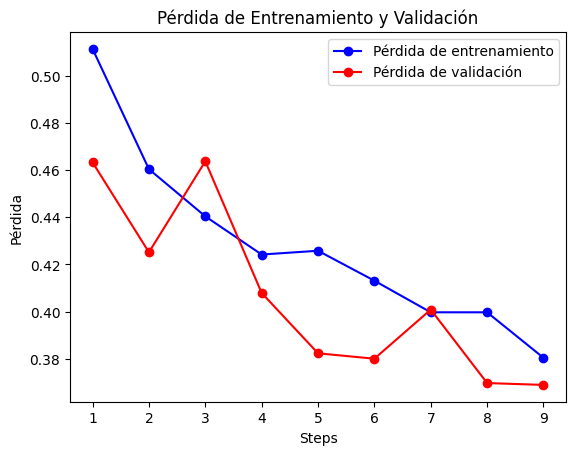

In [24]:
plot_loss(trainer_roberta)

Matriz de confusion

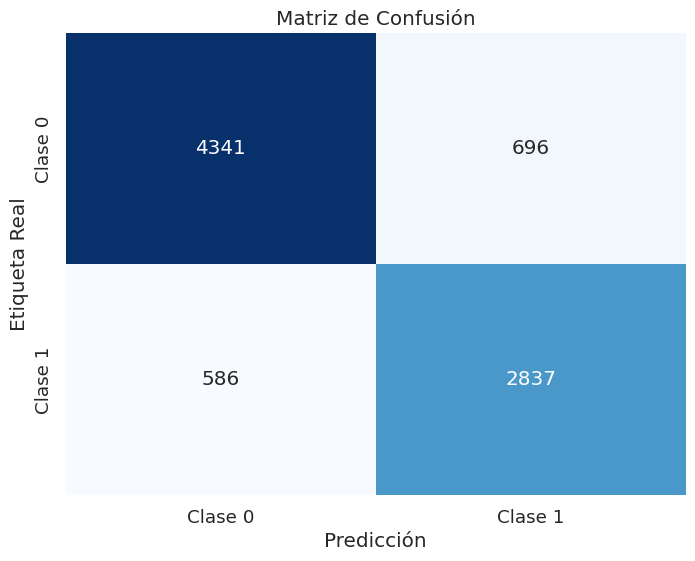

In [25]:
plot_confusion_matrix(trainer_roberta,test_prepared_ds)

### **5.4. Modelos de imagenes 2 (embedding + red de clasificacion)**

####**5.4.0 Utilidades**

Verificamos donde esta el device

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


####**5.4.1 Obtener Embeddings**

#####**5.4.1.1 Embedding CLIP**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from datasets import Dataset, load_metric, Image
from PIL import Image as ImagePIL
import pandas as pd
import os
import shutil
from tqdm import tqdm

from transformers import CLIPProcessor, CLIPModel

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Cargar el modelo y el procesador CLIP
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
model = model.to(device)

In [ ]:
# Divide tu dataset en conjuntos de entrenamiento, validación y prueba
ds=Dataset.from_pandas(df_img)

# Función para cargar imágenes devuelve un tensot hxwxc
def load_image(image_path):
    return ImagePIL.open(image_path).convert("RGB")

def get_image_embeddings(data_loader):
    model.eval()  # Coloca el modelo en modo de evaluación
    embeddings = []
    labels = []

    with torch.no_grad():  # Desactiva el cálculo de gradientes para ahorro de memoria
        for batch in tqdm(data_loader, desc="Capturando Embeddings"):
            # Extraer imágenes y etiquetas del lote
            image_paths = batch['image']
            batch_labels = batch['labels']

            # Procesar las imágenes
            images = [load_image(image_path).convert("RGB") for image_path in image_paths]
            inputs = processor(images=images, return_tensors="pt", padding=True).to(device)

            # Obtener los embeddings
            outputs = model.get_image_features(**inputs)
            embeddings.extend(outputs.detach().cpu().numpy())
            labels.extend(batch_labels.cpu().numpy())  # Mover las etiquetas a la CPU

            torch.cuda.empty_cache()  # Liberar memoria de la GPU

    return embeddings, labels

# Crear un DataLoader
batch_size = 32  # Ajuste según la capacidad de su GPU
data_loader = DataLoader(ds, batch_size=batch_size, shuffle=False, num_workers=4)
ds_embeddings, ds_labels = get_image_embeddings(data_loader)

# Guardar embeddings en archivos CSV
def save_embeddings_to_csv(embeddings, labels, file_name):
    os.makedirs('embeddings_clip4', exist_ok=True)
    embeddings_df = pd.DataFrame([embedding.flatten() for embedding in embeddings])
    embeddings_df['label'] = labels  # Añade la columna de etiquetas
    embeddings_df.to_csv(f'embeddings_clip4/{file_name}.csv', index=False)

save_embeddings_to_csv(ds_embeddings, ds_labels, 'ds_embeddings')

import shutil
# Mover el archivo zip a Google Drive (ajusta la ruta según sea necesario)
shutil.move("/content/embeddings_clip4", "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto")

Capturando Embeddings:   0%|          | 0/1580 [00:00<?, ?it/s]

'/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_clip4'

In [ ]:
# Inspeccionar un elemento del dataset
sample_element = ds[0]
print(f"Estructura del elemento: {type(sample_element)}")
print(f"Contenido del elemento: {sample_element}")

Estructura del elemento: <class 'dict'>
Contenido del elemento: {'image': '/content/images/239vnh.jpg', 'labels': 1, '__index_level_0__': 0}


In [ ]:
# Inspeccionar un lote del DataLoader
sample_batch = next(iter(data_loader))
print(f"Tipo de un lote: {type(sample_batch)}")
print(f"Contenido de un lote: {sample_batch}")

Tipo de un lote: <class 'dict'>
Contenido de un lote: {'image': ['/content/images/239vnh.jpg', '/content/images/cd9y6e.jpg', '/content/images/3gduaq.jpg', '/content/images/cq10fmf.jpg', '/content/images/csu8ljf.jpg', '/content/images/bxohq2.jpg', '/content/images/citmsnq.jpg', '/content/images/cy5em5o.jpg', '/content/images/cpdc8o.jpg', '/content/images/d8ix1u.jpg', '/content/images/4uh2bi.jpg', '/content/images/cpyyu2.jpg', '/content/images/cre8ime.jpg', '/content/images/bvqh75.jpg', '/content/images/begw49.jpg', '/content/images/dh3qb7.jpg', '/content/images/co6qoe.jpg', '/content/images/2kz9ts.jpg', '/content/images/ehe88ht.jpg', '/content/images/coa3a4.jpg', '/content/images/ct8lm5k.jpg', '/content/images/7mad8i.jpg', '/content/images/d0ix7kr.jpg', '/content/images/39qnyi.jpg', '/content/images/8v30dq.jpg', '/content/images/42flp5.jpg', '/content/images/e2vbi7b.jpg', '/content/images/905fc3.jpg', '/content/images/bxlqig.jpg', '/content/images/c1bmx3.jpg', '/content/images/eq4zjzx.j

#####**5.4.1.2 Embedding VIT**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from datasets import Dataset, load_metric, Image
from PIL import Image as ImagePIL
import pandas as pd
import os
import shutil
from tqdm import tqdm

from transformers import ViTModel, ViTFeatureExtractor

In [ ]:
# Cargar el modelo ViT y su procesador
model_id = "google/vit-base-patch16-224"
model = ViTModel.from_pretrained(model_id)
processor = ViTFeatureExtractor.from_pretrained(model_id)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
#movemos el modelo a la cpu
model = model.to(device)

In [ ]:
# Divide tu dataset en conjuntos de entrenamiento, validación y prueba
ds=Dataset.from_pandas(df_img)

# Función para cargar imágenes devuelve un tensot hxwxc
def load_image(image_path):
    return ImagePIL.open(image_path).convert("RGB")

def get_image_embeddings(data_loader):
    model.eval()  # Coloca el modelo en modo de evaluación
    embeddings = []
    labels = []

    with torch.no_grad():  # Desactiva el cálculo de gradientes para ahorro de memoria
        for batch in tqdm(data_loader, desc="Capturando Embeddings"):
            image_paths = batch['image']
            batch_labels = batch['labels']

            # Procesar las imágenes
            images = [load_image(image_path) for image_path in image_paths]
            inputs = processor(images=images, return_tensors="pt", padding=True).to(device)

            # Obtener los embeddings
            outputs = model(**inputs)
            embeddings.extend(outputs.last_hidden_state[:, 0, :].cpu().numpy())
            labels.extend(batch_labels.cpu().numpy())

            torch.cuda.empty_cache()  # Liberar memoria de la GPU

    return embeddings, labels

# Crear un DataLoader
batch_size = 32  # Ajuste según la capacidad de su GPU
data_loader = DataLoader(ds, batch_size=batch_size, shuffle=False, num_workers=4)
ds_embeddings, ds_labels = get_image_embeddings(data_loader)

# Guardar embeddings en archivos CSV
def save_embeddings_to_csv(embeddings, labels, file_name):
    os.makedirs('embeddings_vit', exist_ok=True)
    embeddings_df = pd.DataFrame([embedding.flatten() for embedding in embeddings])
    embeddings_df['label'] = labels  # Añade la columna de etiquetas
    embeddings_df.to_csv(f'embeddings_vit/{file_name}.csv', index=False)

save_embeddings_to_csv(ds_embeddings, ds_labels, 'ds_embeddings')

import shutil
# Mover el archivo zip a Google Drive (ajusta la ruta según sea necesario)
shutil.move("/content/embeddings_vit", "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto")

Capturando Embeddings:   0%|          | 0/1580 [00:00<?, ?it/s]

'/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_vit'

#####**5.4.1.3 Embedding Resnet**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from datasets import Dataset, load_metric, Image
from PIL import Image as ImagePIL
import pandas as pd
import os
import shutil
from tqdm import tqdm

from torchvision.models import resnet50
from torchvision import transforms

In [ ]:

# Cargar modelo ResNet preentrenado
model = resnet50(pretrained=True)

# Transformaciones para la imagen (ajustar según sea necesario)
processor = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s]


In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Divide tu dataset en conjuntos de entrenamiento, validación y prueba
ds=Dataset.from_pandas(df_img)

# Función para cargar imágenes devuelve un tensot hxwxc
def load_image(image_path):
    return ImagePIL.open(image_path).convert("RGB")

def get_image_embeddings(data_loader):
    model.eval()  # Coloca el modelo en modo de evaluación
    embeddings = []
    labels = []

    with torch.no_grad():  # Desactiva el cálculo de gradientes para ahorro de memoria
        for batch in tqdm(data_loader, desc="Capturando Embeddings"):
            image_paths = batch['image']
            batch_labels = batch['labels']

            # Procesar las imágenes
            images = [processor(load_image(image_path)).unsqueeze(0) for image_path in image_paths]
            images = torch.cat(images).to(device)  # Combina en un tensor y mueve a la GPU

            # Obtener los embeddings
            outputs = model(images)
            embeddings.extend(outputs.cpu().numpy())
            labels.extend(batch_labels.cpu().numpy())

            torch.cuda.empty_cache()  # Liberar memoria de la GPU

    return embeddings, labels

# Crear un DataLoader
batch_size = 32
data_loader = DataLoader(ds, batch_size=batch_size, shuffle=False, num_workers=4)
ds_embeddings, ds_labels = get_image_embeddings(data_loader)

# Guardar embeddings en archivos CSV
def save_embeddings_to_csv(embeddings, labels, file_name):
    os.makedirs('embeddings_resnet', exist_ok=True)
    embeddings_df = pd.DataFrame([embedding.flatten() for embedding in embeddings])
    embeddings_df['label'] = labels  # Añade la columna de etiquetas
    embeddings_df.to_csv(f'embeddings_resnet/{file_name}.csv', index=False)

save_embeddings_to_csv(ds_embeddings, ds_labels, 'ds_embeddings')

import shutil
# Mover el archivo zip a Google Drive (ajusta la ruta según sea necesario)
shutil.move("/content/embeddings_resnet", "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto")

Capturando Embeddings: 100%|██████████| 1580/1580 [10:15<00:00,  2.57it/s]


'/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_resnet'

####**5.4.2 Configuracion de entrenamiento**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from datasets import Dataset, load_metric, Image
from PIL import Image as ImagePIL
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

Funcion para split dataset

In [ ]:
# dividir dataset
def divdir_dataset(path, batch_size):

  df = pd.read_csv(path)

  # Dividir en entrenamiento y un conjunto temporal (temp) en proporciones 70% y 30%
  train_ds, temp_ds = train_test_split(df, test_size=0.3, random_state=42)
  val_ds, test_ds = train_test_split(temp_ds, test_size=0.5, random_state=42)


  # Convertir las características de los embeddings y etiquetas a tensores y moverlos a la GPU si está disponible
  train_embeddings = torch.tensor(train_ds.iloc[:, :-1].values).float().to(device)
  val_embeddings = torch.tensor(val_ds.iloc[:, :-1].values).float().to(device)
  test_embeddings = torch.tensor(test_ds.iloc[:, :-1].values).float().to(device)

  train_labels = torch.tensor(train_ds['label'].values).long().to(device)
  val_labels = torch.tensor(val_ds['label'].values).long().to(device)
  test_labels = torch.tensor(test_ds['label'].values).long().to(device)

  # Crear TensorDatasets
  train_tensors = TensorDataset(train_embeddings, train_labels)
  val_tensors = TensorDataset(val_embeddings, val_labels)
  test_tensors = TensorDataset(test_embeddings, test_labels)

  # Crear DataLoaders
  train_loader = DataLoader(train_tensors, batch_size=batch_size, shuffle=True)
  val_loader = DataLoader(val_tensors, batch_size=batch_size)
  test_loader = DataLoader(test_tensors, batch_size=batch_size)

  return train_loader, val_loader, test_loader, train_embeddings

Red

In [ ]:
#red de clasificacion
class ClassificationNet(nn.Module):
    def __init__(self, embedding_size, num_classes):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(embedding_size, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Agregar dropout con una probabilidad de 0.5
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Aplicar dropout después de la activación ReLU
        x = self.fc2(x)
        return x

Configuracion del entrenamiento

In [ ]:
#configuracion del entrenamiento
def train(model, train_loader, val_loader, epochs, learning_rate,weight_decay):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Inicializa listas para almacenar métricas y pérdidas
    train_losses = []
    val_losses = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    fbeta_scores = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for data, targets in train_loader:
            targets = targets.long()
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

             # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validación
        avg_val_loss, accuracy, precision, recall, f1, fbeta = validate(model, val_loader, criterion)
        val_losses.append(avg_val_loss)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        fbeta_scores.append(fbeta)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, F-Beta Score: {fbeta:.4f}')

    torch.cuda.empty_cache()

    return train_losses, val_losses, accuracies, precisions, recalls, f1_scores, fbeta_scores


def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, targets in val_loader:
            targets = targets.long()
            outputs = model(data)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            all_targets.extend(targets.tolist())
            all_predictions.extend(predicted.tolist())

    avg_loss = total_loss / len(val_loader)

    # Calcula métricas usando sklearn
    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='weighted')
    recall = recall_score(all_targets, all_predictions, average='weighted')
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    fbeta = fbeta_score(all_targets, all_predictions, beta=0.5, average='weighted')

    torch.cuda.empty_cache()

    return avg_loss, accuracy, precision, recall, f1, fbeta


####**5.4.3 Entrenamiento CLIP**

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Carga de embeddings y red de clasificacion

In [ ]:
# Cargar los embeddings pre-entrenados con imagenes custom
path='/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_clip4/ds_embeddings.csv'

# Dividir data en train, valid y test de los embedding pre-entrenados
batch_size = 64
train_loader, val_loader, test_loader,train_embeddings=divdir_dataset(path,batch_size)

# Obtener el tamaño de los embeddings y luego hacer la red de clasificacion
embedding_size = train_embeddings.shape[1]
num_classes = 2
net = ClassificationNet(embedding_size, num_classes).to(device)
print(net)

ClassificationNet(
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [ ]:
# verfificar tamaño de embeddings
train_embeddings.shape

torch.Size([35385, 512])

Entrenamiento

In [ ]:
# Entrenamiento de la red
learning_rate = 5e-5
epochs = 40
weight_decay=0.01
train_losses, val_losses, accuracies, precisions, recalls, f1_scores, fbeta_scores=train(net, train_loader, val_loader, epochs, learning_rate,weight_decay)

Epoch [1/40], Train Loss: 0.5280, Validation Loss: 0.4397, Accuracy: 0.8038, Precision: 0.8040, Recall: 0.8038, F1 Score: 0.8039, F-Beta Score: 0.8040
Epoch [2/40], Train Loss: 0.4280, Validation Loss: 0.4049, Accuracy: 0.8184, Precision: 0.8190, Recall: 0.8184, F1 Score: 0.8186, F-Beta Score: 0.8188
Epoch [3/40], Train Loss: 0.4036, Validation Loss: 0.3904, Accuracy: 0.8237, Precision: 0.8254, Recall: 0.8237, F1 Score: 0.8243, F-Beta Score: 0.8249
Epoch [4/40], Train Loss: 0.3902, Validation Loss: 0.3816, Accuracy: 0.8299, Precision: 0.8323, Recall: 0.8299, F1 Score: 0.8306, F-Beta Score: 0.8315
Epoch [5/40], Train Loss: 0.3792, Validation Loss: 0.3733, Accuracy: 0.8334, Precision: 0.8368, Recall: 0.8334, F1 Score: 0.8343, F-Beta Score: 0.8356
Epoch [6/40], Train Loss: 0.3708, Validation Loss: 0.3677, Accuracy: 0.8344, Precision: 0.8356, Recall: 0.8344, F1 Score: 0.8348, F-Beta Score: 0.8352
Epoch [7/40], Train Loss: 0.3648, Validation Loss: 0.3619, Accuracy: 0.8392, Precision: 0.8416

Salvar modelo

In [ ]:
# Salvar el modelo completo
name = 'model_clip_ft'
path = f'/content/drive/MyDrive/{name}.pth'
torch.save(net, path)

Evaluacion

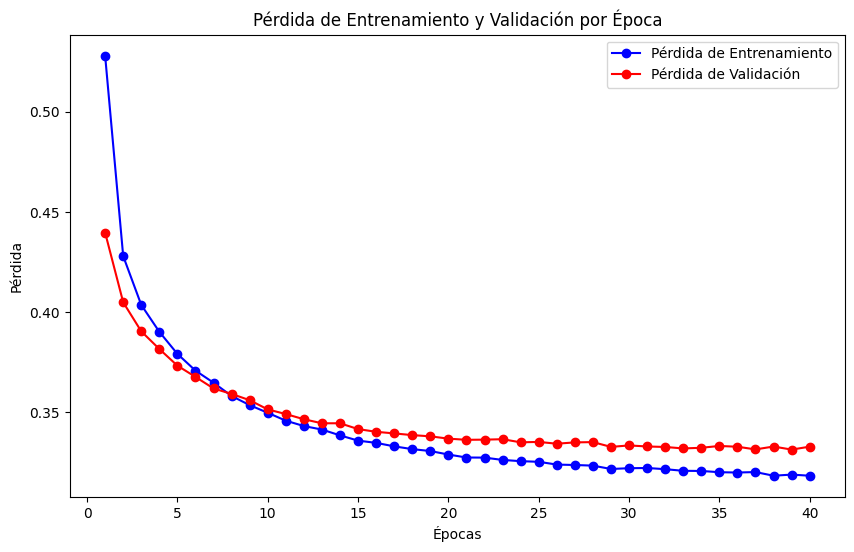

In [ ]:
# Grafica de perdidas de entrenamiento y validacion
epochs = range(1, len(train_losses) + 1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'bo-', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_losses, 'ro-', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

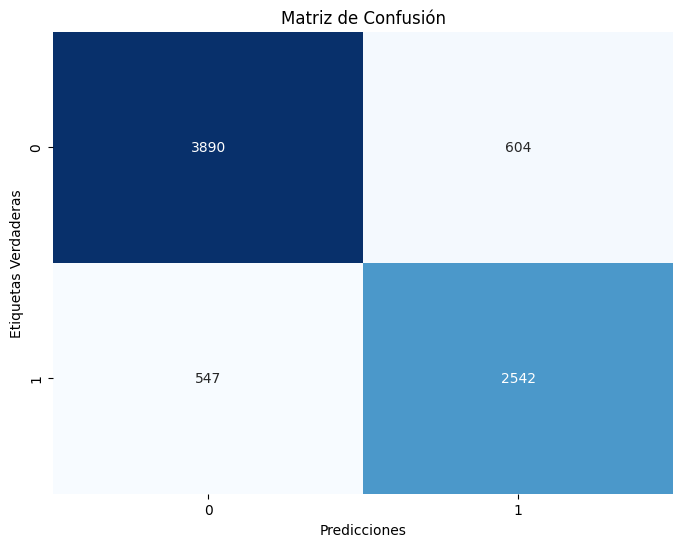

In [ ]:
# Matriz de confusión
# Función para obtener las predicciones, esta funcion toma los embeddigns y las etiquetas
def get_predictions(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return all_targets, all_predictions

# Obtener predicciones y etiquetas verdaderas
true_labels, predicted_labels = get_predictions(net, test_loader)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

####**5.4.4 Entrenamiento ViT**

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Carga de embeddings y red de clasificacion

In [ ]:
# Cargar los embeddings pre-entrenados con imagenes custom
path='/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_vit/ds_embeddings.csv'

# Dividir data en train, valid y test de los embedding pre-entrenados
batch_size = 64
train_loader, val_loader, test_loader,train_embeddings=divdir_dataset(path,batch_size)

# Obtener el tamaño de los embeddings y luego hacer la red de clasificacion
embedding_size = train_embeddings.shape[1]
num_classes = 2
net = ClassificationNet(embedding_size, num_classes).to(device)
print(net)

ClassificationNet(
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


Entrenamiento

In [ ]:
# Entrenamiento de la red
learning_rate = 5e-5
epochs = 40
weight_decay=0.01
train_losses, val_losses, accuracies, precisions, recalls, f1_scores, fbeta_scores=train(net, train_loader, val_loader, epochs, learning_rate,weight_decay)

Epoch [1/40], Train Loss: 0.5869, Validation Loss: 0.5249, Accuracy: 0.7419, Precision: 0.7393, Recall: 0.7419, F1 Score: 0.7393, F-Beta Score: 0.7390
Epoch [2/40], Train Loss: 0.5133, Validation Loss: 0.4943, Accuracy: 0.7628, Precision: 0.7621, Recall: 0.7628, F1 Score: 0.7624, F-Beta Score: 0.7622
Epoch [3/40], Train Loss: 0.4858, Validation Loss: 0.4813, Accuracy: 0.7709, Precision: 0.7711, Recall: 0.7709, F1 Score: 0.7710, F-Beta Score: 0.7711
Epoch [4/40], Train Loss: 0.4692, Validation Loss: 0.4746, Accuracy: 0.7703, Precision: 0.7691, Recall: 0.7703, F1 Score: 0.7695, F-Beta Score: 0.7692
Epoch [5/40], Train Loss: 0.4566, Validation Loss: 0.4691, Accuracy: 0.7763, Precision: 0.7761, Recall: 0.7763, F1 Score: 0.7762, F-Beta Score: 0.7762
Epoch [6/40], Train Loss: 0.4471, Validation Loss: 0.4640, Accuracy: 0.7802, Precision: 0.7796, Recall: 0.7802, F1 Score: 0.7799, F-Beta Score: 0.7797
Epoch [7/40], Train Loss: 0.4375, Validation Loss: 0.4608, Accuracy: 0.7799, Precision: 0.7789

Salvar modelo

In [ ]:
# Salvar el modelo completo
name = 'model_vit_ft'
path = f'/content/drive/MyDrive/{name}.pth'
torch.save(net, path)

Evaluacion

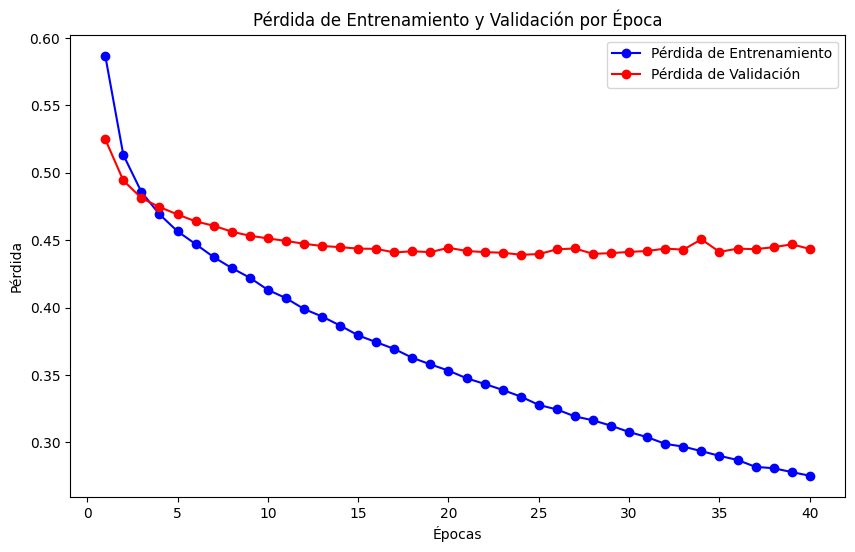

In [ ]:
# Grafica de perdidas de entrenamiento y validacion
epochs = range(1, len(train_losses) + 1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'bo-', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_losses, 'ro-', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

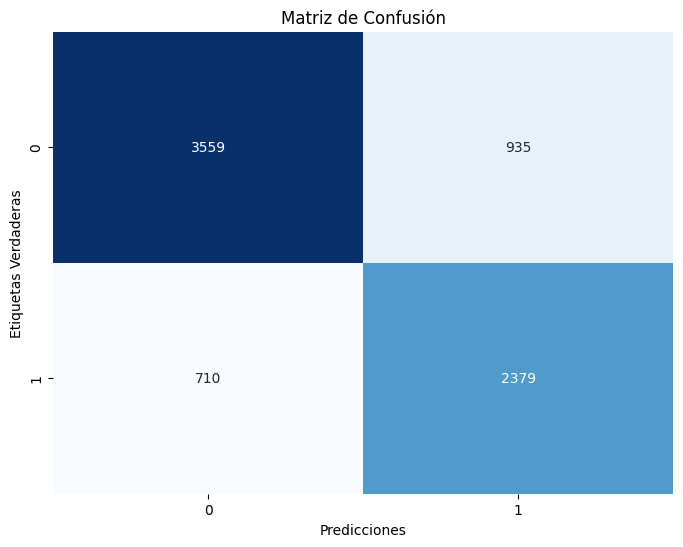

In [ ]:
# Matriz de confusión
# Función para obtener las predicciones, esta funcion toma los embeddigns y las etiquetas
def get_predictions(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return all_targets, all_predictions

# Obtener predicciones y etiquetas verdaderas
true_labels, predicted_labels = get_predictions(net, test_loader)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

#### **5.4.5 Entrenamiento Resnet**

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Carga de embeddings y red de clasificacion

In [ ]:
# Cargar los embeddings pre-entrenados con imagenes custom
path='/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/embeddings_resnet/ds_embeddings.csv'

# Dividir data en train, valid y test de los embedding pre-entrenados
batch_size = 64
train_loader, val_loader, test_loader,train_embeddings=divdir_dataset(path,batch_size)

# Obtener el tamaño de los embeddings y luego hacer la red de clasificacion
embedding_size = train_embeddings.shape[1]
num_classes = 2
net = ClassificationNet(embedding_size, num_classes).to(device)
print(net)

ClassificationNet(
  (fc1): Linear(in_features=1000, out_features=512, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


Entrenamiento

In [ ]:
# Entrenamiento de la red
learning_rate = 5e-5
epochs = 40
weight_decay=0.01
train_losses, val_losses, accuracies, precisions, recalls, f1_scores, fbeta_scores=train(net, train_loader, val_loader, epochs, learning_rate,weight_decay)

Epoch [1/40], Train Loss: 0.5583, Validation Loss: 0.4926, Accuracy: 0.7529, Precision: 0.7519, Recall: 0.7529, F1 Score: 0.7523, F-Beta Score: 0.7521
Epoch [2/40], Train Loss: 0.4978, Validation Loss: 0.4744, Accuracy: 0.7630, Precision: 0.7622, Recall: 0.7630, F1 Score: 0.7625, F-Beta Score: 0.7623
Epoch [3/40], Train Loss: 0.4752, Validation Loss: 0.4607, Accuracy: 0.7752, Precision: 0.7758, Recall: 0.7752, F1 Score: 0.7754, F-Beta Score: 0.7757
Epoch [4/40], Train Loss: 0.4619, Validation Loss: 0.4557, Accuracy: 0.7785, Precision: 0.7778, Recall: 0.7785, F1 Score: 0.7781, F-Beta Score: 0.7779
Epoch [5/40], Train Loss: 0.4532, Validation Loss: 0.4555, Accuracy: 0.7748, Precision: 0.7756, Recall: 0.7748, F1 Score: 0.7751, F-Beta Score: 0.7754
Epoch [6/40], Train Loss: 0.4468, Validation Loss: 0.4502, Accuracy: 0.7783, Precision: 0.7781, Recall: 0.7783, F1 Score: 0.7782, F-Beta Score: 0.7781
Epoch [7/40], Train Loss: 0.4417, Validation Loss: 0.4519, Accuracy: 0.7721, Precision: 0.7714

Salvar modelo

In [ ]:
# Salvar el modelo completo
name = 'model_vit'
path = f'/content/drive/MyDrive/{name}.pth'
torch.save(net, path)

Evaluacion

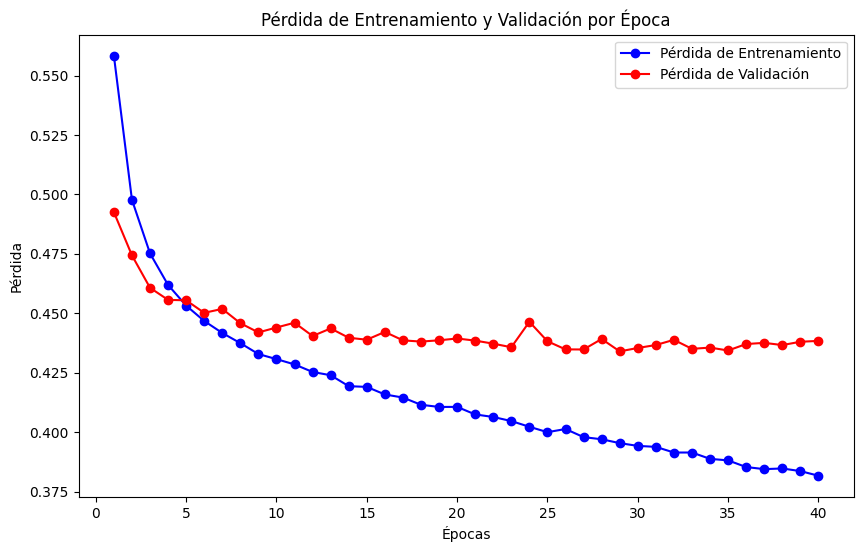

In [ ]:
# Grafica de perdidas de entrenamiento y validacion
epochs = range(1, len(train_losses) + 1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'bo-', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_losses, 'ro-', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

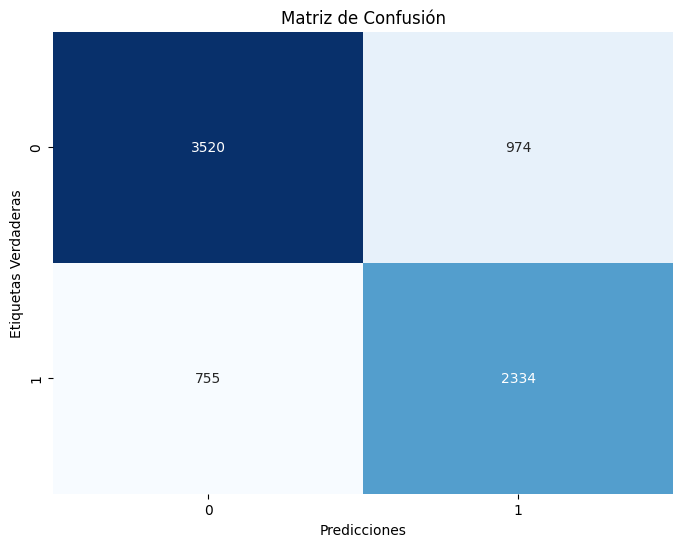

In [ ]:
# Matriz de confusión
# Función para obtener las predicciones, esta funcion toma los embeddigns y las etiquetas
def get_predictions(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return all_targets, all_predictions

# Obtener predicciones y etiquetas verdaderas
true_labels, predicted_labels = get_predictions(net, test_loader)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

#### **5.4.6 Testing del mejor modelo**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import io
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# Carga el modelo para obtener emmeddings
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

# Carga la red pre-entrenada
net=torch.load('/content/drive/MyDrive/model_clip_ft.pth')

In [ ]:
def get_image_emmbeding(image_path):

  # Cargar la imagen
  image = Image.open(image_path).convert("RGB")

  # Procesar la imagen con el procesador CLIP
  inputs = processor(images=image, return_tensors="pt", padding=True).to(device)

  # Obtener los embeddings de la imagen
  with torch.no_grad():
      embeddings = model.get_image_features(**inputs)

  embedding_size=embeddings.shape[1]
  # Asegúrate de que la forma de los embeddings coincida con la esperada por tu red
  embeddings = embeddings.view(-1, embedding_size)

  return embeddings

def get_prediction_with_probability(model, data):

    model.eval()
    with torch.no_grad():
        outputs = model(data)
        probabilities = F.softmax(outputs, dim=1)
        _, predicted = torch.max(probabilities, 1)
        predicted_class = predicted.item()
        predicted_probability = probabilities[0, predicted_class].item()

    return predicted_class, predicted_probability

In [ ]:
# Subir archivo desde tu computadora (esto ya lo has hecho)
uploaded = files.upload()
filename = next(iter(uploaded))

# Cargar la imagen
image_path = io.BytesIO(uploaded[filename])

# Uso de la función con un tensor de embeddings para una sola imagen
embeddings=get_image_emmbeding(image_path)
prediction, probability = get_prediction_with_probability(net, embeddings)
print("Predicción:", prediction)
print("Probabilidad:", probability)

Saving 3gduaq.jpg to 3gduaq.jpg
Predicción: 1
Probabilidad: 0.847079336643219


### **5.5 Modelos LLMs (Llama 2)**

In [ ]:
import os
import torch
from PIL import Image as PILImage
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline,
    logging,
)

In [ ]:
image_to_text = pipeline("image-to-text",model="nlpconnect/vit-gpt2-image-captioning")

# Funcion para tranforma una image a texto
def get_image_description(image_url):
    i_image = PILImage.open(image_url)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")
    r = image_to_text(i_image)[0]
    return r['generated_text']

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# Codigo para cargar el LLM (LLama 2)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=getattr(torch, 'float16'),
    bnb_4bit_use_double_quant=False,
)

model_name = "NousResearch/Llama-2-7b-chat-hf"

# Load base model
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=bnb_config, device_map= {"": 0})
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens= 200)

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [ ]:
# Funcion para crear la respuesta en lenguaje natural
prompt_base = """Give a natural language response of the results \
and try to explain to me with a lot of details the reason for the classification. \n\n"""

def nlp_answer(p: int, text = None, image = None):
  assert text or image, "Text or/and Image are requiered"

  prompt = prompt_base

  if text:
    prompt += f"News' Text: {text}\n"
  if image:
    prompt += f"News' Image Description: {image}\n"


  if p > 70:
    final_prompt = f'The news is fake with a {p}% probability, beacuse'
  elif p < 30:
    final_prompt = f'The news is real with a {100-p}% probability, beacuse'
  else:
    final_prompt = 'There is not much certainty about the classification of the news item, beacuse'

  prompt += 'Result and Explanation: ' + final_prompt


  r = pipe(prompt, return_full_text=False, temperature=0.8)
  result = final_prompt + r[0]['generated_text']
  result = result.split('\n')[0]

  return result

####**Prueba del LLM**

In [ ]:
text = 'rainbow faucet selftitled.'
image = 'a candle is lit in a car window.'

In [ ]:
print(nlp_answer(80, text, image))
print()
print()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(


The news is fake with a 80% probability, beacuse the text and image do not match. The text is about a rainbow faucet, but the image shows a candle being lit in a car window. This is a common technique used by fake news creators to make their content appear more believable.




In [ ]:
print(nlp_answer(50, text, image))
print()
print()

There is not much certainty about the classification of the news item, beacuse the text and image do not provide any clear indication of the topic. The text could be about a new product, a creative expression, or a metaphor. The image could be a representation of a car ride, a candle, or a window. Therefore, the classification is "Undetermined".




In [ ]:
print(nlp_answer(10, image, image))
print()
print()

The news is real with a 90% probability, beacuse the image description is very detailed and the image is clear.




##**6. Front End**

### **6.3. Mover modelos a drive**

In [ ]:
import shutil
# Mover la carpeta
#shutil.move('/content/text_model_roberta' , '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto')
#shutil.move('/content/image_model_ViT' , '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto')
#shutil.move('/content/image_model_DinoV2' , '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto')
#shutil.move('/content/image_model_Resnet' , '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto')
#shutil.move('/content/image_model_resnet' , '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto')

'/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/image_model_Resnet'

###**6.1. Prueba de modelo de texto**

Importar librerias

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer,AutoModelForSequenceClassification

Carga de datos

In [ ]:
#Cargar dataset
file = '/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/dataset_curso.csv'
df = pd.read_csv(file)

Probando el modelo de texto

In [ ]:
# Función para cargar el modelo
def load_model_txt(model_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return model

# Función para predecir
def predict_txt(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probabilities.detach().numpy()

In [ ]:
model_path = "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/text_model"  # Ruta del modelo entrenado
model = load_model_txt(model_path)
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

In [ ]:
df[['clean_title','2_way_label']].head(10)

,clean_title,2_way_label
0,portland water supply to be flushed after teen...,1
1,when all the pundits said clinton would win th...,0
2,king femme dirty kitty this is my first time i...,0
3,angry human yelling at peaceful human,1
4,oh i get it now haha,0
5,gpa still got the game,0
6,the orange light and the rain on my windshield...,1
7,dad regrets not buying an ice cream for his da...,0
8,doggy time,0
9,the way that the new leaf is forming on my plant,1


In [ ]:
txt=df['clean_title'][0]
probabilities = predict_txt(model, tokenizer, txt)
fake_prob_txt = probabilities[0][1]
fake_prob_txt

0.9716412

In [ ]:
txt

'portland water supply to be flushed after teen urinates into reservoir'

Probando el llm

In [ ]:
print(nlp_answer(round(fake_prob_txt*100,2), text=txt, image=None))
print()
print()

The news is fake with a 97.16% probability, beacuse it is highly unlikely that a teenager would be able to urinate into a reservoir, as they are typically located at high elevations and are surrounded by fences and other security measures to prevent unauthorized access. Additionally, the Portland Water Bureau has not made any announcements about flushing the city's water supply, and there is no credible source to support this claim.




###**6.2. Prueba de modelo de imagenes**

Importar librerias

In [ ]:
import torch
from transformers import AutoImageProcessor,ViTForImageClassification
from PIL import Image as PILImage

Probando el modelo

In [ ]:
# Función para cargar el modelo de imágenes
def load_model_img(model_path):
    model = ViTForImageClassification.from_pretrained(model_path)
    return model

# Función para predecir con imágenes
def predict_img(model, processor, image_file):
    image = PILImage.open(image_file)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probabilities.detach().numpy(), image

In [ ]:
model_path_img = "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/image_model_ViT"
model_img = load_model_img(model_path_img)
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

Carga y descarga de imagen

In [ ]:
df[['clean_title','2_way_label','id']].head(20)

,clean_title,2_way_label,id
0,portland water supply to be flushed after teen...,1,239vnh
1,when all the pundits said clinton would win th...,0,8p52o3
2,king femme dirty kitty this is my first time i...,0,cd9y6e
3,angry human yelling at peaceful human,1,3gduaq
4,oh i get it now haha,0,cq10fmf
5,gpa still got the game,0,csu8ljf
6,the orange light and the rain on my windshield...,1,bxohq2
7,dad regrets not buying an ice cream for his da...,0,citmsnq
8,doggy time,0,cy5em5o
9,the way that the new leaf is forming on my plant,1,cpdc8o


In [ ]:
#funcion para descargar una imagen
import requests
from PIL import Image as PILImage
from io import BytesIO

# URL de la imagen
id=11
url = df['image_url'].loc[id]
name= df['id'].loc[id]

# Descargar la imagen
respuesta = requests.get(url)

# Verificar que la descarga fue exitosa
if respuesta.status_code == 200:
    imagen = PILImage.open(BytesIO(respuesta.content))
    imagen.show()

    # Guardar la imagen localmente
    with open(f'{name}.jpg', 'wb') as f:
        f.write(respuesta.content)

In [ ]:
from google.colab import files
import io

# Subir archivo desde tu computadora
upload = files.upload()

# Obtener el nombre del archivo y los datos del archivo
file_name, file_data = next(iter(upload.items()))

# Crear un objeto BytesIO con los datos del archivo
image_stream = io.BytesIO(file_data)

# Predecir con la imagen
probabilities_img, img = predict_img(model_img, processor, image_stream)
fake_prob_img = probabilities_img[0][1]

Saving 3gduaq.jpg to 3gduaq (2).jpg


In [ ]:
round(fake_prob_img,2)

0.85

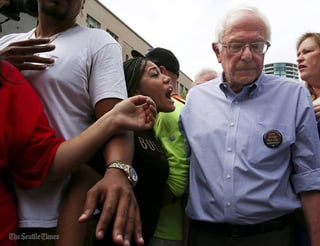

In [ ]:
img

Probando el LLM

In [ ]:
print(nlp_answer(round(fake_prob_img*100,2), text=None, image=img))
print()
print()

The news is fake with a 85.26% probability, beacuse the image is a manipulated version of a real image. The manipulation is detected by the fact that the image has a very low level of detail, and the colors are not consistent with the original image. The image has also been rotated and cropped to make it look like a different image.




###**6.4. Streamlit**

In [1]:
from IPython import display
! pip install -q accelerate==0.21.0 bitsandbytes==0.40.2 transformers==4.31.0 xformers
display.clear_output()

In [1]:
from IPython import display
# Instalamos las librerías
!pip install streamlit
!pip install pyngrok==4.1.1
!pip install pipreqs
display.clear_output()

In [ ]:
from IPython import display
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Crear el archivo VeritasCorp

In [2]:
%%writefile VeritasCorp.py

import streamlit as st
import torch
from transformers import AutoTokenizer, AutoImageProcessor, AutoModelForSequenceClassification, ViTForImageClassification
from PIL import Image
import io

from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline,
    logging,
)

## --- Modelo de texto ---##

def load_model_txt(model_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    return model

def predict_txt(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probabilities.detach().numpy()

model_path_txt = "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/text_model"
model_txt = load_model_txt(model_path_txt)
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

## --- Modelo de imagenes --- ##

def load_model_img(model_path):
    model = ViTForImageClassification.from_pretrained(model_path)
    return model

def predict_img(model, processor, image_file):
    image = Image.open(image_file)
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probabilities.detach().numpy()

model_path_img = "/content/drive/MyDrive/000 MIA UC/Proyecto Aplicado/Proyecto/image_model_ViT"
model_img = load_model_img(model_path_img)
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

## --- LLM--- ##

# cargar modelo que pasa de imagen a texto
image_to_text = pipeline("image-to-text",model="nlpconnect/vit-gpt2-image-captioning")

# funcion que toma una imagen en formato PIL y devuelve un texto
def get_image_description(image_url):
    i_image = Image.open(image_url)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    r = image_to_text(i_image)[0]
    return r['generated_text']

# Llama 2
model_name = "NousResearch/Llama-2-7b-chat-hf"
bnb_config = BitsAndBytesConfig(load_in_4bit=True,bnb_4bit_quant_type="nf4",bnb_4bit_compute_dtype=getattr(torch, 'float16'),bnb_4bit_use_double_quant=False,)

# Cargar LLaMA model
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=bnb_config, device_map= {"": 0})
model.config.use_cache = False
model.config.pretraining_tp = 1

# Cargar LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens= 200)

# Funcion para crear la respuesta en lenguaje natural
prompt_base = """Give a natural language response of the results \
and try to explain to me with a lot of details the reason for the classification. \n\n"""

def nlp_answer(p: int, text = None, image = None):
  assert text or image, "Text or/and Image are requiered"

  prompt = prompt_base

  if text:
    prompt += f"News' Text: {text}\n"
  if image:
    prompt += f"News' Image Description: {image}\n"

  if p > 70:
    final_prompt = f'The news is fake with a {p}% probability, beacuse'
  elif p < 30:
    final_prompt = f'The news is real with a {100-p}% probability, beacuse'
  else:
    final_prompt = 'There is not much certainty about the classification of the news item, beacuse'

  prompt += 'Result and Explanation: ' + final_prompt


  r = pipe(prompt, return_full_text=False, temperature=0.8)
  result = final_prompt + r[0]['generated_text']
  result = result.split('\n')[0]

  return result

## --- Streamlit --- ###

# Configuración de la página
st.set_page_config(
    page_title="VeritasCorp",
    page_icon="✨",
    layout="wide"
)

st.title("✨ VeritasCorp")

st.info("""
Prototype created for VeritasCorp to distinguish Fabulas
from real news. This prototype is multipolar and
flexible, supports text inputs and images.
""")

# Entradas de usuario
text = st.text_area('Write the text of the news', '', max_chars=5000)
image_upload = st.file_uploader("Upload the image of the news", type=['jpg', 'png', 'jpeg'])

if st.button('Analyze'):
    if not text and not image_upload:
        st.warning("Please input text or upload an image for analysis.")
    else:
        with st.spinner('Analyzing...'):
            predictions = []
            image_description = None

            # Análisis de texto
            if text:
                probabilities = predict_txt(model_txt, tokenizer, text)
                fake_prob = probabilities[0][1] * 100
                predictions.append(fake_prob)

            # Análisis de imagen
            if image_upload:
                if image_upload.size > 5 * 1024 * 1024:  # 5 MB limit
                    st.warning("The image size is too large. Please upload an image smaller than 5 MB.")
                else:
                    image_bytes = image_upload.read()
                    image_stream = io.BytesIO(image_bytes)
                    probabilities_img = predict_img(model_img, processor, image_stream)
                    fake_prob_img = probabilities_img[0][1] * 100
                    predictions.append(fake_prob_img)

                    # Obtener descripción de la imagen
                    image_description = get_image_description(image_stream)

            # Cálculo del promedio de predicciones y generación de la explicación
            if predictions:
                average_prediction = sum(predictions) / len(predictions)
                st.success(f"Average probability of being fake news: {average_prediction:.2f}%")

                # Generar explicación
                explanation = nlp_answer(round(average_prediction,2), text=text, image=image_description)
                st.markdown("### Explanation")
                st.write(explanation)

Writing VeritasCorp.py


In [3]:
# Check files in directory
!ls

drive  sample_data  VeritasCorp.py


In [4]:
!cat /root/.ngrok2/ngrok.yml


cat: /root/.ngrok2/ngrok.yml: No such file or directory


#### **6.4. Ejecutando la APP localmente usando ngrok**

In [5]:
!ngrok authtoken 2YHDs8zAfrFdwwtOpIGxt2MdFcL_6wckFbXCRVb1D8JgkF7vZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [6]:
#verificamos ngrok
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [7]:
from pyngrok import ngrok

In [8]:
# Run app on the background
!streamlit run VeritasCorp.py&>/dev/null&

In [9]:
!pgrep streamlit

2207


In [10]:
# Create a public url for the developer to run the app at the web locally
public_url = ngrok.connect(port='8501')
public_url

'http://d430-35-187-228-212.ngrok-free.app'

In [11]:
!pipreqs . --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
